## Projeto de Data Mining - Análise de Investimentos em ações e fundos do mercado Brasileiro

In [1]:
# Entendemos que o dataset estava inconpleto e optamos por criar uma automação para buscar as seguintes informações, através de web scrapping:
# 'CÓDIGO', 'TIPO', 'SETOR', 'COTAÇÃO ATUAL', 'MÍNIMA', 'MÁXIMA', 'D/Y', 'LIQ.DIÁRIA', 'P/VP', 'CAGR LUCRO', 'PATRIMÔNIO LÍQUIDO', 'CAIXA', 'LUCRO'])

'''#código automação ações part 1
from selenium import webdriver
from time import sleep as sl
import pandas as pd
import pyautogui as py
#a biblioteca selenium fará a parte da automação juntamente com a biblioteca pyautogui

#a biblioteca sleep faz o código ter um delay, é útil para quando um site demora para carregar, já que esse delay pode nos 
#prevenir de erros desnecessários do programa por causa dessa demora

#a biblioteca pandas nos serviu na criação de DataFrames e na leitura de arquivos em excel pelo python

df = pd.read_excel('statusinvest-busca_acoes.xlsx')
#planilha em excel adquirida por meio do site statusinvest, no qual nos fornece-a gratuitamente 
display(df)
# df será a variável que terá nosso DataFrame'''


"#código automação ações part 1\nfrom selenium import webdriver\nfrom time import sleep as sl\nimport pandas as pd\nimport pyautogui as py\n#a biblioteca selenium fará a parte da automação juntamente com a biblioteca pyautogui\n\n#a biblioteca sleep faz o código ter um delay, é útil para quando um site demora para carregar, já que esse delay pode nos \n#prevenir de erros desnecessários do programa por causa dessa demora\n\n#a biblioteca pandas nos serviu na criação de DataFrames e na leitura de arquivos em excel pelo python\n\ndf = pd.read_excel('statusinvest-busca_acoes.xlsx')\n#planilha em excel adquirida por meio do site statusinvest, no qual nos fornece-a gratuitamente \ndisplay(df)\n# df será a variável que terá nosso DataFrame"

In [2]:
'''#código automação ações part 2
#AÇÕES
navegador = webdriver.Chrome()
navegador.get('https://www.google.com')
link = 'https://statusinvest.com.br/'
navegador.get(link)
print(link)
#as funcões acima servem para o selenium entrar no site statusinvest, onde tiraremos nossas informações

py.keyDown('win')
py.press('up')
py.keyUp('win')

nome = []
setor = []
cot_atual = []
dy = []
pvp  = []
cagr = []
liqdia = []
caixa = []
maxima = []
minima = []
patliq = []
tipo = []
lucro = []
#estas listas acima são todas as informações que pegaremos do site, nas quais serão transformadas em um DataFrame depois

for c in df['TICKER']:
    #Looping 'for' para pegar cada ticker(código) das ações no DataFrame 
    nome.append(c)
    navegador.find_element('xpath', '//*[@id="main-nav-nav"]/div/div/div/ul/li[2]/a/i').click()
    navegador.find_element('xpath', '//*[@id="main-search"]/div[1]/span[1]/input[2]').send_keys(c)
    try:
        sl(3.5)
        navegador.find_element('xpath', '//*[@id="main-search"]/div[2]/div/div/a').click()
    except:
        sl(2)
        navegador.find_element('xpath', '//*[@id="main-search"]/div[2]/div/div/a').click()
        
    #tratamento de erro usado aqui para prevenir erros enquanto o programa está funcionando, se houver um 
    #erro o progresso será pausado
    
    sl(1)
    tipo.append(navegador.find_element('xpath', '//*[@id="main-header"]/div[2]/div/div[1]/div/ol/li[2]/a/span').text)
    cot_atual.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div/div[1]/div/div[1]/div/div[1]/strong').text)
    maxima.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div/div[1]/div/div[3]/div/div[1]/strong').text)
    minima.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div/div[1]/div/div[2]/div/div[1]/strong').text)
    dy.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div/div[1]/div/div[4]/div/div[1]/strong').text)
    
    py.scroll(-1000)
    sl(0.5)
    liqdia.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div/div[5]/div/div/div[3]/div/div/div/strong').text)
    py.scroll(-900)
    sl(0.5)
    pvp.append(navegador.find_element('xpath', '//*[@id="indicators-section"]/div[2]/div/div[1]/div/div[4]/div/div/strong').text)
    cagr.append(navegador.find_element('xpath', '//*[@id="indicators-section"]/div[2]/div/div[5]/div/div[2]/div/div/strong').text)
    
    navegador.find_element('xpath', '//*[@id="main-2"]/div[1]/div/div/ul/li[2]/a').click()
    sl(0.5)
    py.scroll(-500)
    sl(0.5)
    patliq.append(navegador.find_element('xpath', '//*[@id="company-section"]/div[1]/div/div[2]/div[1]/div/div/strong').text)
    setor.append(navegador.find_element('xpath', '//*[@id="company-section"]/div[1]/div/div[3]/div/div[1]/div/div/div/a/strong').text)
    
    navegador.find_element('xpath', '//*[@id="main-2"]/div[1]/div/div/ul/li[3]/a').click()
    sl(1)
    py.scroll(-1300)
    sl(1)
    try:
        caixa.append(navegador.find_element('xpath', '//*[@id="contabil-section"]/div[1]/div/div[3]/div[1]/div[1]/table/tbody/tr[1]/td[2]/span').text)
        lucro.append(navegador.find_element('xpath', '//*[@id="contabil-section"]/div[1]/div/div[3]/div[1]/div[1]/table/tbody/tr[3]/td[2]/span').text)
    except:
        sl(1.5)
        caixa.append(navegador.find_element('xpath', '//*[@id="contabil-section"]/div[1]/div/div[3]/div[1]/div[1]/table/tbody/tr[1]/td[2]/span').text)
        lucro.append(navegador.find_element('xpath', '//*[@id="contabil-section"]/div[1]/div/div[3]/div[1]/div[1]/table/tbody/tr[3]/td[2]/span').text)
  
    #funções da biblioteca selenium para pegar informações do site e colocá-las em suas respectivas listas 
    #(por isso usei a função append também)'''

'#código automação ações part 2\n#AÇÕES\nnavegador = webdriver.Chrome()\nnavegador.get(\'https://www.google.com\')\nlink = \'https://statusinvest.com.br/\'\nnavegador.get(link)\nprint(link)\n#as funcões acima servem para o selenium entrar no site statusinvest, onde tiraremos nossas informações\n\npy.keyDown(\'win\')\npy.press(\'up\')\npy.keyUp(\'win\')\n\nnome = []\nsetor = []\ncot_atual = []\ndy = []\npvp  = []\ncagr = []\nliqdia = []\ncaixa = []\nmaxima = []\nminima = []\npatliq = []\ntipo = []\nlucro = []\n#estas listas acima são todas as informações que pegaremos do site, nas quais serão transformadas em um DataFrame depois\n\nfor c in df[\'TICKER\']:\n    #Looping \'for\' para pegar cada ticker(código) das ações no DataFrame \n    nome.append(c)\n    navegador.find_element(\'xpath\', \'//*[@id="main-nav-nav"]/div/div/div/ul/li[2]/a/i\').click()\n    navegador.find_element(\'xpath\', \'//*[@id="main-search"]/div[1]/span[1]/input[2]\').send_keys(c)\n    try:\n        sl(3.5)\n      

In [3]:
'''#código automação ações part 3
df = pd.DataFrame(zip(nome, tipo, setor, cot_atual, minima, maxima, dy, liqdia, pvp, cagr, patliq, caixa, lucro), columns=['CÓDIGO', 'TIPO', 'SETOR', 'COTAÇÃO ATUAL', 'MÍNIMA', 'MÁXIMA', 'D/Y', 'LIQ.DIÁRIA', 'P/VP', 'CAGR LUCRO', 'PATRIMÔNIO LÍQUIDO', 'CAIXA', 'LUCRO'])
display(df)
#função da biblioteca pandas para transformar listas em DataFrames 

df.to_excel('Análise_ações.xlsx')
#exportação do DataFrame em formato excel'''

"#código automação ações part 3\ndf = pd.DataFrame(zip(nome, tipo, setor, cot_atual, minima, maxima, dy, liqdia, pvp, cagr, patliq, caixa, lucro), columns=['CÓDIGO', 'TIPO', 'SETOR', 'COTAÇÃO ATUAL', 'MÍNIMA', 'MÁXIMA', 'D/Y', 'LIQ.DIÁRIA', 'P/VP', 'CAGR LUCRO', 'PATRIMÔNIO LÍQUIDO', 'CAIXA', 'LUCRO'])\ndisplay(df)\n#função da biblioteca pandas para transformar listas em DataFrames \n\ndf.to_excel('Análise_ações.xlsx')\n#exportação do DataFrame em formato excel"

In [4]:
'''#código automação fundos part 1

#FUNDOS
df2 = pd.read_excel('fundos_junho.xlsx')
#planilha em excel adquirida por meio do projeto em python abaixo

df2 = df2.drop(['Unnamed: 0'], axis=1)
display(df2)
# df2 será a variável que terá nosso DataFrame'''

"#código automação fundos part 1\n\n#FUNDOS\ndf2 = pd.read_excel('fundos_junho.xlsx')\n#planilha em excel adquirida por meio do projeto em python abaixo\n\ndf2 = df2.drop(['Unnamed: 0'], axis=1)\ndisplay(df2)\n# df2 será a variável que terá nosso DataFrame"

In [5]:
'''#código automação fundos part 2 

navegador = webdriver.Chrome()
navegador.get('https://www.google.com')
link = 'https://statusinvest.com.br/'
navegador.get(link)
print(link)
#as funcões acima servem para o selenium entrar no site statusinvest, onde tiraremos nossas informações

py.keyDown('win')
py.press('up')
py.keyUp('win')

codigo = []
setor = []
tipo = []
maxima = []
minima = []
cot_atual = []
dy = []
liq_dia = []
patrim = []
caixa = []
cagr = []
pvp = []
#estas listas acima são todas as informações que pegaremos do site, nas quais serão transformadas em um DataFrame depois

for c in df2['TICKER']:
    #Looping 'for' para pegar cada ticker(código) das ações no DataFrame
    codigo.append(c)
    navegador.find_element('xpath', '//*[@id="main-nav-nav"]/div/div/div/ul/li[2]/a/i').click()
    navegador.find_element('xpath', '//*[@id="main-search"]/div[1]/span[1]/input[2]').send_keys(c)
    try:
        sl(3)
        navegador.find_element('xpath', '//*[@id="main-search"]/div[2]/div/div/a').click()
        
    except:
        sl(2)
        navegador.find_element('xpath', '//*[@id="main-search"]/div[2]/div/div/a').click()
    #tratamento de erro usado aqui para prevenir erros enquanto o programa está funcionando, se houver um 
    #erro o progresso será pausado
        
    tipo.append(navegador.find_element('xpath', '//*[@id="main-header"]/div[2]/div/div[1]/div/ol/li[2]/a/span').text)
    
    cot_atual.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[1]/div[1]/div/div[1]/strong').text)
    
    maxima.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[1]/div[3]/div/div[1]/strong').text)
    #                                              //*[@id="main-2"]/div[2]/div[1]/div[3]/div/div[1]/strong
    
    minima.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[1]/div[2]/div/div[1]/strong').text)
    
    dy.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[1]/div[4]/div/div[1]/strong').text)
    
    py.scroll(-1200)
    sl(0.5)
    try:
        pvp.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[4]/div/div[2]/div/div[1]/strong').text)
    except:
        pvp.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[5]/div/div[2]/div/div[1]/strong').text)                                          
    
    try:
        patrim.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[4]/div/div[1]/div/div[2]/span[2]').text)
    except:
        patrim.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[5]/div/div[1]/div/div[2]/span[2]').text)
    try:  
        caixa.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[4]/div/div[2]/div/div[2]/span[2]').text)
    except:
        caixa.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[5]/div/div[2]/div/div[2]/span[2]').text)
    try:    
        cagr.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[4]/div/div[5]/div/div[1]/strong').text)
    except:
        cagr.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[5]/div/div[5]/div/div[1]/strong').text)
    try:    
        liq_dia.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[6]/div/div/div[3]/div/div/div/strong').text)
    except:
        liq_dia.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[5]/div/div/div[3]/div/div/div/strong').text)
        
    navegador.find_element('xpath', '//*[@id="main-2"]/div[1]/div/div/ul/li[2]/a').click()
    sl(0.5)
    py.scroll(-250)
    sl(0.3)
    try:
        setor.append(navegador.find_element('xpath', '//*[@id="fund-section"]/div/div/div[4]/div/div[1]/div/div/div/a/strong').text)
    except:                                           
        setor.append(navegador.find_element('xpath', '//*[@id="fund-section"]/div/div/div[5]/div/div[1]/div/div/div/a/strong').text)
    #funções da biblioteca selenium para pegar informações do site e colocá-las em suas respectivas listas 
    #(por isso usei a função append também)'''

'#código automação fundos part 2 \n\nnavegador = webdriver.Chrome()\nnavegador.get(\'https://www.google.com\')\nlink = \'https://statusinvest.com.br/\'\nnavegador.get(link)\nprint(link)\n#as funcões acima servem para o selenium entrar no site statusinvest, onde tiraremos nossas informações\n\npy.keyDown(\'win\')\npy.press(\'up\')\npy.keyUp(\'win\')\n\ncodigo = []\nsetor = []\ntipo = []\nmaxima = []\nminima = []\ncot_atual = []\ndy = []\nliq_dia = []\npatrim = []\ncaixa = []\ncagr = []\npvp = []\n#estas listas acima são todas as informações que pegaremos do site, nas quais serão transformadas em um DataFrame depois\n\nfor c in df2[\'TICKER\']:\n    #Looping \'for\' para pegar cada ticker(código) das ações no DataFrame\n    codigo.append(c)\n    navegador.find_element(\'xpath\', \'//*[@id="main-nav-nav"]/div/div/div/ul/li[2]/a/i\').click()\n    navegador.find_element(\'xpath\', \'//*[@id="main-search"]/div[1]/span[1]/input[2]\').send_keys(c)\n    try:\n        sl(3)\n        navegador.fi

In [6]:
###########################################################################################################################

In [7]:
###########################################################################################################################

In [8]:
 ##Importar bibliotecas necessárias para a realização do projeto

import pandas as pd
import numpy as np
import pandas_profiling as pdpf
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#!pip install kmodes


C:\Users\elysi\AppData\Local\Temp\ipykernel_23760\2557263095.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pdpf


In [9]:
# Erro ao tentar abrir o arquivo em csv
# ParserError: Error tokenizing data. C error: Expected 5 fields in line 3, saw 7
#df=pd.read_csv('projeto_dm.csv')

In [10]:
# Abrir o arquivo no formato excel, devido a erro no formato csv
dfx = pd.read_excel('projeto_dm.xlsx')
#PROJETO DM é um arquivo com a junção dos DataFrames dos fundos e das ações

In [11]:
#Verificar as dimensões do data set
dfx.shape

(897, 14)

In [12]:
#Verificar o cabeçalho do data set
dfx.head(10)

,CÓDIGO,TIPO,SETOR,COTAÇÃO ATUAL,PREÇO MÍNIMO,PREÇO MÁXIMO,DIVIDEND YIELD,LIQUIDEZ DIÁRIA,P/VP,CAGR LUCRO,PATRIMÔNIO LÍQUIDO,CAIXA,LUCRO,INVESTIR
0,AALR3,AÇÃO,Saúde,22.69,19.38,22.75,0.0000,803918465,2.73,-,9.819170e+08,187300000,-219240000,NÃO
1,ABCB4,AÇÃO,Financeiro e Outros,16.69,14.47,22.29,0.0649,124751399,0.72,0.1336,5.205386e+09,3559270000,800230000,SIM
2,ABEV3,AÇÃO,Consumo não Cíclico,14.65,12.47,16.03,0.0520,47099952297,2.77,0.1474,8.332783e+10,20642150000,1489129,NÃO
3,ADHM3,AÇÃO,Saúde,1.56,1.56,1.56,0.0000,-,-1.29,-,-1.977600e+07,160000,-4940000,NÃO
4,AERI3,AÇÃO,Bens Industriais,1.35,0.88,5.19,0.0000,603962032,1.17,-,8.848680e+08,-13300000,-108740000,SIM
5,AESB3,AÇÃO,Utilidade Pública,10.27,9.05,11.20,0.0105,1909473332,1.11,-,5.573795e+09,-1024850000,-,SIM
6,AFLT3,AÇÃO,Utilidade Pública,9.00,8.65,10.50,0.0262,711628,2.18,0.2453,2.607320e+08,20700000,37490000,NÃO
7,AGRO3,AÇÃO,Consumo não Cíclico,24.92,20.04,31.53,0.1300,12017837,1.24,0.3906,2.051176e+09,205180000,520100000,NÃO
8,AGXY3,AÇÃO,Consumo não Cíclico,7.64,6.66,10.65,0.0220,30030206,0.87,-,1.501466e+09,-144110000,0,SIM
9,AHEB3,AÇÃO,Consumo Cíclico,20.00,17.00,30.00,0.0000,2000,-30.06,-,-5.685000e+06,24860000,64730000,NÃO


In [13]:
#Verificar as últimas instâncias do data set
dfx.tail(10)

,CÓDIGO,TIPO,SETOR,COTAÇÃO ATUAL,PREÇO MÍNIMO,PREÇO MÁXIMO,DIVIDEND YIELD,LIQUIDEZ DIÁRIA,P/VP,CAGR LUCRO,PATRIMÔNIO LÍQUIDO,CAIXA,LUCRO,INVESTIR
887,IRDM11,FUNDO,Títulos e Val. Mob.,78.13,77.69,108.15,0.1602,741287903,0.87,-0.0602,3.261837e+09,17689322828,0,NÃO
888,IRIM11,FUNDO,Híbrido,86.35,84.00,110.55,0.1611,6659091,0.91,-,1.821963e+08,869205343,0,SIM
889,ITIP11,FUNDO,Títulos e Val. Mob.,73.40,70.99,87.00,0.1454,12014326,0.98,-,5.586329e+07,87606815,0,SIM
890,ITIT11,FUNDO,Títulos e Val. Mob.,71.77,68.58,82.59,0.0963,11853071,0.97,-,6.676037e+07,1935914,0,SIM
891,JFLL11,FUNDO,Residencial,67.01,56.15,79.30,0.1122,4719637,0.66,-,1.518730e+08,372890539,0,SIM
892,JGPX11,FUNDO,Híbrido,96.70,94.21,98.90,0.1493,12728271,1,-,8.171437e+07,291330211,0,SIM
893,JPPA11,FUNDO,Títulos e Val. Mob.,93.25,90.47,109.30,0.2072,35115949,0.95,-0.0062,8.896746e+07,70237432,0,NÃO
894,JRDM11,FUNDO,Shoppings,78.79,75.25,87.93,0.0932,2534089,0.89,0.0312,2.233239e+08,178760205,0,NÃO
895,JSAF11,FUNDO,Títulos e Val. Mob.,84.50,76.14,94.75,0.1324,40772397,0.93,-,1.419765e+08,1838064816,0,SIM
896,JSRE11,FUNDO,Híbrido,66.12,61.00,88.40,0.0882,204680657,0.59,-0.1289,2.340464e+09,580274082,0,NÃO


In [14]:
# Overview das variáveis
display(dfx.dtypes)

CÓDIGO                 object
TIPO                   object
SETOR                  object
COTAÇÃO ATUAL         float64
PREÇO MÍNIMO          float64
PREÇO MÁXIMO          float64
DIVIDEND YIELD        float64
LIQUIDEZ DIÁRIA        object
P/VP                   object
CAGR LUCRO             object
PATRIMÔNIO LÍQUIDO    float64
CAIXA                  object
LUCRO                  object
INVESTIR               object
dtype: object

In [15]:
'''#Exibir o Data Frame completo
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
display(dfx)'''

"#Exibir o Data Frame completo\npd.set_option('display.max_columns', None)\npd.set_option('display.max_rows', None)\ndisplay(dfx)"

In [16]:
# Utilizar o método replace() para substituir '-' por 0

dfx['LIQUIDEZ DIÁRIA'] = dfx['LIQUIDEZ DIÁRIA'].replace('-', 0)
dfx['P/VP'] = dfx['P/VP'].replace('-', 0)
dfx['CAGR LUCRO'] = dfx['CAGR LUCRO'].replace('-', 0)
dfx['CAIXA'] = dfx['CAIXA'].replace('-', 0)
dfx['LUCRO'] = dfx['LUCRO'].replace('-', 0)

dfx['LIQUIDEZ DIÁRIA'] = dfx['LIQUIDEZ DIÁRIA'].astype('float64')
dfx['P/VP'] = dfx['P/VP'].astype('float64')
dfx['CAGR LUCRO'] = dfx['CAGR LUCRO'].astype('float64')
dfx['CAIXA'] = dfx['CAIXA'].astype('float64')
dfx['LUCRO'] = dfx['LUCRO'].astype('float64')

# Depois da conversão

print(dfx.dtypes) # Ajuste realizado com sucesso

CÓDIGO                 object
TIPO                   object
SETOR                  object
COTAÇÃO ATUAL         float64
PREÇO MÍNIMO          float64
PREÇO MÁXIMO          float64
DIVIDEND YIELD        float64
LIQUIDEZ DIÁRIA       float64
P/VP                  float64
CAGR LUCRO            float64
PATRIMÔNIO LÍQUIDO    float64
CAIXA                 float64
LUCRO                 float64
INVESTIR               object
dtype: object


In [17]:
#Soma dos valores nulos em cada variável == 0 em todas as variáveis
print(dfx.isnull().sum())

CÓDIGO                0
TIPO                  0
SETOR                 0
COTAÇÃO ATUAL         0
PREÇO MÍNIMO          0
PREÇO MÁXIMO          0
DIVIDEND YIELD        0
LIQUIDEZ DIÁRIA       0
P/VP                  0
CAGR LUCRO            0
PATRIMÔNIO LÍQUIDO    0
CAIXA                 0
LUCRO                 0
INVESTIR              0
dtype: int64


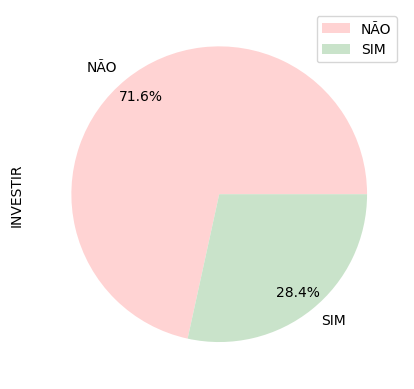

In [18]:
# Contar o número de ocorrências de cada valor na coluna 'INVESTIR'
value_counts = dfx['INVESTIR'].value_counts()
colors = ['#FFD3D3', '#C9E3CA']
pie_chart = value_counts.plot.pie(colors=colors, autopct='%1.1f%%', pctdistance=0.85)
labels = value_counts.index
plt.legend(labels, loc="best")
total = value_counts.sum()
percentages = value_counts / total * 100

# Exibir o gráfico
plt.show()

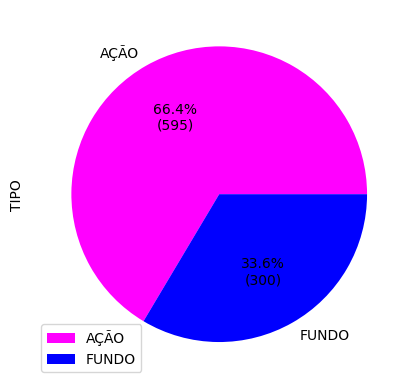

In [19]:
# Contar o número de ocorrências de cada valor na coluna 'TIPO'
value_counts = dfx['TIPO'].value_counts()

colors = ['magenta', 'blue']

pie_chart = value_counts.plot.pie(colors=colors, autopct=lambda p: f'{p:.1f}%\n({int(p * value_counts.sum() / 100)})')

labels = value_counts.index
plt.legend(labels, loc="best")

plt.show()


In [20]:
#Obter as primeiras impressões dos dados, através do resumo estatístico
dfx.describe()

,COTAÇÃO ATUAL,PREÇO MÍNIMO,PREÇO MÁXIMO,DIVIDEND YIELD,LIQUIDEZ DIÁRIA,P/VP,CAGR LUCRO,PATRIMÔNIO LÍQUIDO,CAIXA,LUCRO
count,897.000000,897.000000,897.000000,897.000000,8.970000e+02,897.000000,897.000000,8.970000e+02,8.970000e+02,8.970000e+02
mean,185.911929,174.108004,202.208339,11.972240,2.186699e+09,-13.894627,121.678218,5.804974e+09,2.193437e+09,1.058456e+08
std,2664.413032,2618.736990,2703.481542,356.626053,1.031151e+10,593.494660,1407.407782,2.468712e+10,1.392985e+10,9.147840e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-17420.220000,-0.629200,-2.135882e+10,-9.096640e+09,-8.482400e+08
25%,6.900000,5.530000,9.690000,0.000000,2.576180e+05,0.470000,0.000000,1.393110e+08,1.555000e+07,0.000000e+00
50%,19.110000,15.800000,25.350000,0.047300,1.064489e+07,0.860000,0.000000,7.082480e+08,2.166842e+08,0.000000e+00
75%,67.940000,63.990000,83.990000,0.108700,2.205774e+08,1.250000,0.059500,2.514927e+09,9.967461e+08,4.655000e+07
max,76000.000000,76000.000000,76000.000000,10681.000000,1.801726e+11,2343.690000,20159.000000,3.643850e+11,2.554100e+11,1.890100e+10


In [21]:
# Contar valores ==0
Cotacao_zero = dfx['COTAÇÃO ATUAL']==0
Cotacao_zero.value_counts()
# Percentual de valores == 0 (4,23%)
#(38/897)*100

False    859
True      38
Name: COTAÇÃO ATUAL, dtype: int64

<AxesSubplot: ylabel='Frequency'>

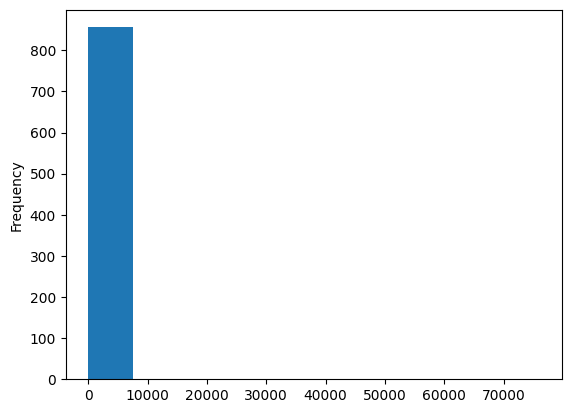

In [22]:
# Busca pela maior incidência de valor (Range entre 0 e 76000)
dfx['COTAÇÃO ATUAL'].loc[lambda x : (x > 0) & (x <= 76000)].plot.hist()

<AxesSubplot: ylabel='Frequency'>

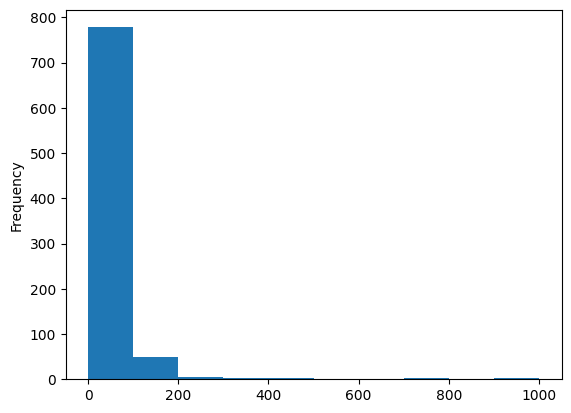

In [23]:
# Busca pela maior incidência de valor(reduzindo o range)
dfx['COTAÇÃO ATUAL'].loc[lambda x : (x > 0) & (x < 1000)].plot.hist()

<AxesSubplot: ylabel='Frequency'>

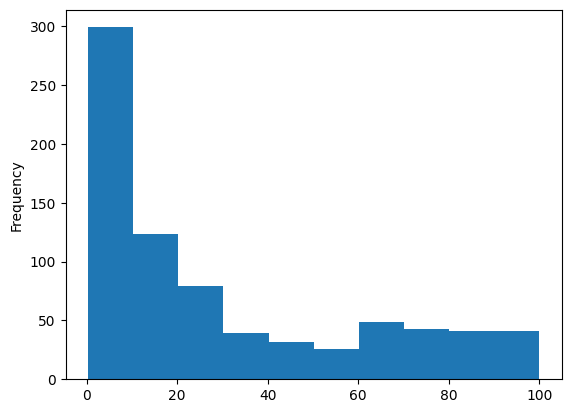

In [24]:
# Busca pela maior incidência de valor(reduzindo o range)
dfx['COTAÇÃO ATUAL'].loc[lambda x : (x > 0) & (x < 100)].plot.hist()

<AxesSubplot: ylabel='Frequency'>

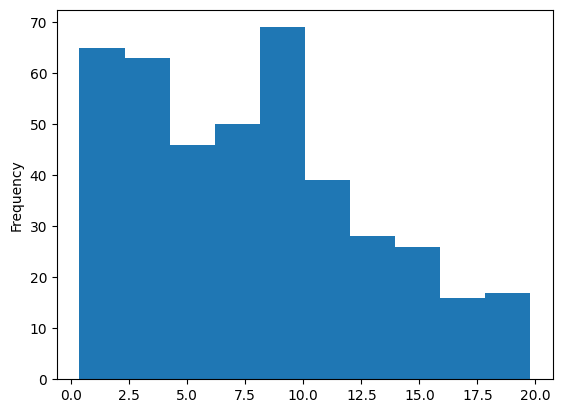

In [25]:
# Busca pela maior incidência de valor(reduzindo o range)
dfx['COTAÇÃO ATUAL'].loc[lambda x : (x > 0) & (x < 20)].plot.hist()

<AxesSubplot: ylabel='Frequency'>

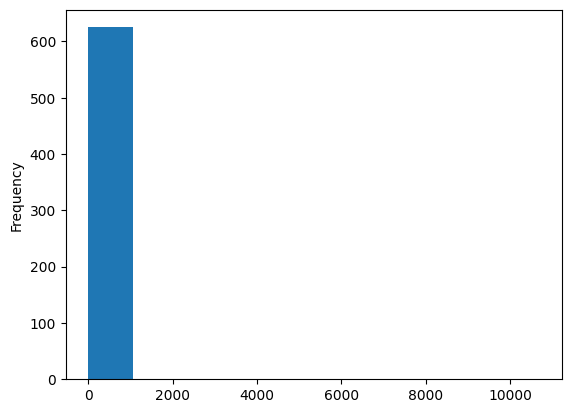

In [26]:
# Localizar as maiores incidências
dfx['DIVIDEND YIELD'].loc[lambda x : (x > 0) & (x <= 10681)].plot.hist()

<AxesSubplot: ylabel='Frequency'>

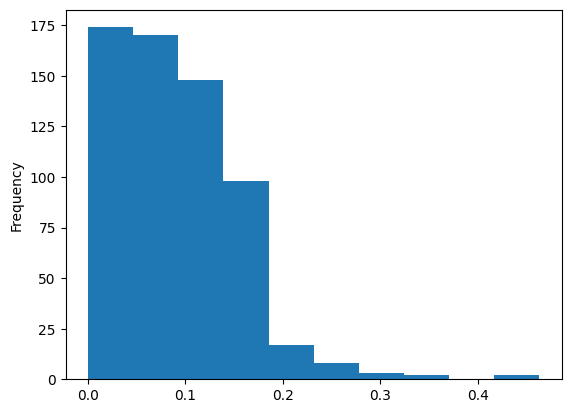

In [27]:
# Localizar as maiores incidências <0.5
dfx['DIVIDEND YIELD'].loc[lambda x : (x > 0) & (x <= 0.5)].plot.hist()

<AxesSubplot: ylabel='Frequency'>

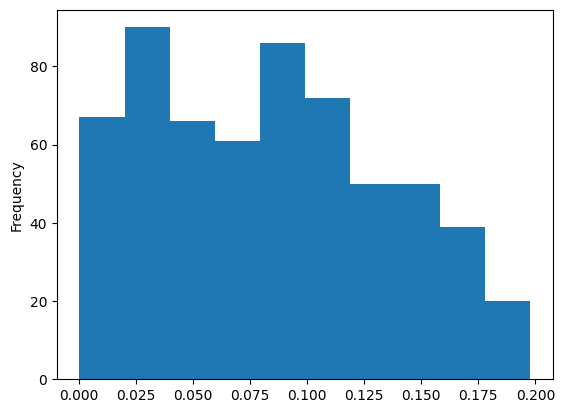

In [28]:
# Localizar as maiores incidências <0.5
dfx['DIVIDEND YIELD'].loc[lambda x : (x > 0) & (x <= 0.2)].plot.hist()
# Verificar % de Dividend Yeld == 0 (30.21%)
#(271/897)*100

In [29]:
# Análise da variável CAGR (Temos valores negativos nesse caso)
dfx['CAGR LUCRO'].value_counts()

0.0000    419
0.1041      7
0.2046      4
0.0147      4
0.3057      3
         ... 
0.1760      1
0.9516      1
0.6686      1
0.2335      1
0.0312      1
Name: CAGR LUCRO, Length: 358, dtype: int64

<AxesSubplot: ylabel='Frequency'>

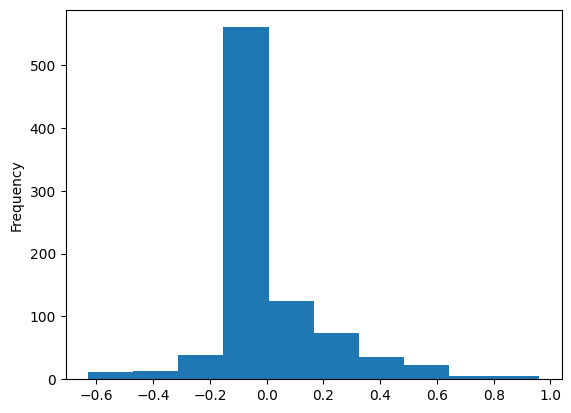

In [30]:
# Localizar as maiores incidências de CAGR 
dfx['CAGR LUCRO'].loc[lambda x : (x > -1.0) & (x <= 1.0)].plot.hist()

<AxesSubplot: ylabel='Frequency'>

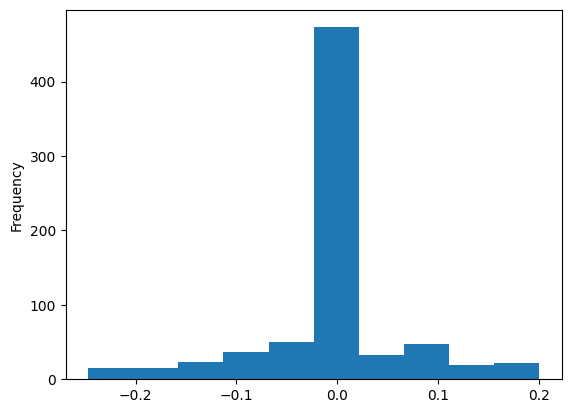

In [31]:
# Zoom na maior concentração de ocorrências de CAGR
dfx['CAGR LUCRO'].loc[lambda x : (x > -0.25) & (x <= 0.2)].plot.hist()

In [32]:
'''#Overview dos dados (Atenção para as correlações)
ProfileReport(dfx)'''

'#Overview dos dados (Atenção para as correlações)\nProfileReport(dfx)'

In [33]:
# Converter a variável preditora em numérica
dfx['INVESTIR'] = dfx['INVESTIR'].replace('NÃO', 0)
dfx['INVESTIR'] = dfx['INVESTIR'].replace('SIM', 1)
# Converter para int e Verificar as alterações
dfx['INVESTIR'] = dfx['INVESTIR'].astype('int64')
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CÓDIGO              897 non-null    object 
 1   TIPO                897 non-null    object 
 2   SETOR               897 non-null    object 
 3   COTAÇÃO ATUAL       897 non-null    float64
 4   PREÇO MÍNIMO        897 non-null    float64
 5   PREÇO MÁXIMO        897 non-null    float64
 6   DIVIDEND YIELD      897 non-null    float64
 7   LIQUIDEZ DIÁRIA     897 non-null    float64
 8   P/VP                897 non-null    float64
 9   CAGR LUCRO          897 non-null    float64
 10  PATRIMÔNIO LÍQUIDO  897 non-null    float64
 11  CAIXA               897 non-null    float64
 12  LUCRO               897 non-null    float64
 13  INVESTIR            897 non-null    int64  
dtypes: float64(10), int64(1), object(3)
memory usage: 98.2+ KB


C:\Users\elysi\AppData\Local\Temp\ipykernel_23760\4231980717.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dfx.corr()


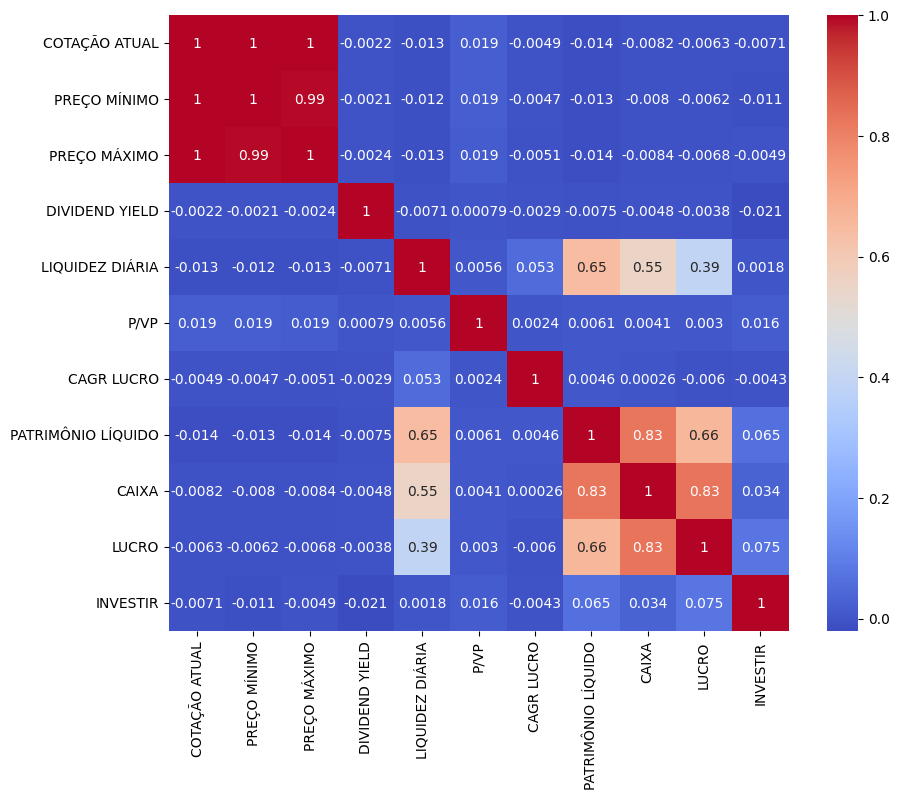

In [34]:
# Selecionar as colunas relevantes para a análise e realizar a matriz de correlação

correlation_matrix = dfx.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

In [35]:
# Filtrar apenas ações para análise mais profunda
df = dfx[dfx['TIPO'] == 'AÇÃO']
display(df)

,CÓDIGO,TIPO,SETOR,COTAÇÃO ATUAL,PREÇO MÍNIMO,PREÇO MÁXIMO,DIVIDEND YIELD,LIQUIDEZ DIÁRIA,P/VP,CAGR LUCRO,PATRIMÔNIO LÍQUIDO,CAIXA,LUCRO,INVESTIR
0,AALR3,AÇÃO,Saúde,22.69,19.38,22.75,0.0000,8.039185e+08,2.73,0.0000,9.819170e+08,1.873000e+08,-219240000.0,0
1,ABCB4,AÇÃO,Financeiro e Outros,16.69,14.47,22.29,0.0649,1.247514e+08,0.72,0.1336,5.205386e+09,3.559270e+09,800230000.0,1
2,ABEV3,AÇÃO,Consumo não Cíclico,14.65,12.47,16.03,0.0520,4.709995e+10,2.77,0.1474,8.332783e+10,2.064215e+10,1489129.0,0
3,ADHM3,AÇÃO,Saúde,1.56,1.56,1.56,0.0000,0.000000e+00,-1.29,0.0000,-1.977600e+07,1.600000e+05,-4940000.0,0
4,AERI3,AÇÃO,Bens Industriais,1.35,0.88,5.19,0.0000,6.039620e+08,1.17,0.0000,8.848680e+08,-1.330000e+07,-108740000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,WHRL3,AÇÃO,Consumo Cíclico,4.44,4.36,5.72,0.0421,8.228370e+05,3.06,-0.0089,2.181353e+09,6.144800e+08,553030000.0,0
592,WHRL4,AÇÃO,Consumo Cíclico,4.46,4.33,5.79,0.0461,4.194171e+06,3.07,-0.0089,2.181353e+09,6.144800e+08,553030000.0,0
593,WLMM3,AÇÃO,Bens Industriais,22.00,19.23,29.24,0.0579,4.400000e+03,1.29,0.0000,6.224090e+08,-1.443100e+08,117270000.0,0
594,WLMM4,AÇÃO,Bens Industriais,21.40,15.32,32.23,0.0382,2.759452e+06,1.25,0.0000,6.224090e+08,-1.443100e+08,117270000.0,0


In [36]:
# Verificar os tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 0 to 595
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CÓDIGO              596 non-null    object 
 1   TIPO                596 non-null    object 
 2   SETOR               596 non-null    object 
 3   COTAÇÃO ATUAL       596 non-null    float64
 4   PREÇO MÍNIMO        596 non-null    float64
 5   PREÇO MÁXIMO        596 non-null    float64
 6   DIVIDEND YIELD      596 non-null    float64
 7   LIQUIDEZ DIÁRIA     596 non-null    float64
 8   P/VP                596 non-null    float64
 9   CAGR LUCRO          596 non-null    float64
 10  PATRIMÔNIO LÍQUIDO  596 non-null    float64
 11  CAIXA               596 non-null    float64
 12  LUCRO               596 non-null    float64
 13  INVESTIR            596 non-null    int64  
dtypes: float64(10), int64(1), object(3)
memory usage: 69.8+ KB


In [37]:
#Visualização dos setores das ações
df.value_counts(df['SETOR'])

SETOR
Consumo Cíclico                    131
Financeiro e Outros                126
Utilidade Pública                   96
Bens Industriais                    81
Materiais Básicos                   60
Consumo não Cíclico                 36
Saúde                               30
Tecnologia da Informação            21
Petróleo, Gás e Biocombustíveis     15
dtype: int64

In [38]:
#Filtrar ações por setor e obter a média de cada setor

Uti_Púb = df[df['SETOR'] == 'Utilidade Pública']
Bens_Ind = df[df['SETOR'] == 'Bens Industriais']
Mat_Básico = df[df['SETOR'] == 'Materiais Básicos']
Cons_Cíclico = df[df['SETOR'] == 'Consumo Cíclico']
Cons_n_Cícl = df[df['SETOR'] == 'Consumo não Cíclico']
Saúde = df[df['SETOR'] == 'Saúde']
Fin_e_Outros = df[df['SETOR'] == 'Financeiro e Outros']
Tec_da_Info = df[df['SETOR'] == 'Tecnologia da Informação']
Petr_Gás_e_Biocomb = df[df['SETOR'] == 'Petróleo, Gás e Biocombustíveis']

#lista para unir os DataFrames de cada setor
ma=[]

ma.append(Cons_Cíclico)
ma.append(Fin_e_Outros)
ma.append(Uti_Púb)
ma.append(Bens_Ind)
ma.append(Mat_Básico)
ma.append(Cons_n_Cícl)
ma.append(Saúde)
ma.append(Tec_da_Info)
ma.append(Petr_Gás_e_Biocomb)

# lista com os nomes de cada setor (para faciltar)
ma2=[]

ma2.append('Cons_Cíclico')
ma2.append('Fin_e_Outros')
ma2.append('Uti_Púb')
ma2.append('Bens_Ind')
ma2.append('Mat_Básico')
ma2.append('Cons_n_Cícl')
ma2.append('Saúde')
ma2.append('Tec_da_Info')
ma2.append('Petr_Gás_e_Biocomb')

dfa = pd.DataFrame(zip(ma))

#display(ma)

#média do dy
media = Cons_Cíclico['DIVIDEND YIELD'].mean()
print("Média da coluna 'DIVIDEND YIELD':\033[1;32m", media, '\033[m')

Média da coluna 'DIVIDEND YIELD': 0.019857251908396947 


In [39]:
# Média de cotação por setor
cont = 0
for c in ma:
    media = c['COTAÇÃO ATUAL'].mean()
    #print(c)
    print("Média da coluna 'COTAÇÃO ATUAL' do setor {}:\033[1;32m".format(ma2[cont]), media, '\033[m')
    cont += 1

Média da coluna 'COTAÇÃO ATUAL' do setor Cons_Cíclico: 22.284122137404584 
Média da coluna 'COTAÇÃO ATUAL' do setor Fin_e_Outros: 107.11388888888887 
Média da coluna 'COTAÇÃO ATUAL' do setor Uti_Púb: 35.70916666666667 
Média da coluna 'COTAÇÃO ATUAL' do setor Bens_Ind: 63.88481481481482 
Média da coluna 'COTAÇÃO ATUAL' do setor Mat_Básico: 29.335 
Média da coluna 'COTAÇÃO ATUAL' do setor Cons_n_Cícl: 142.68444444444447 
Média da coluna 'COTAÇÃO ATUAL' do setor Saúde: 13.617333333333335 
Média da coluna 'COTAÇÃO ATUAL' do setor Tec_da_Info: 9.783333333333335 
Média da coluna 'COTAÇÃO ATUAL' do setor Petr_Gás_e_Biocomb: 14.760000000000002 


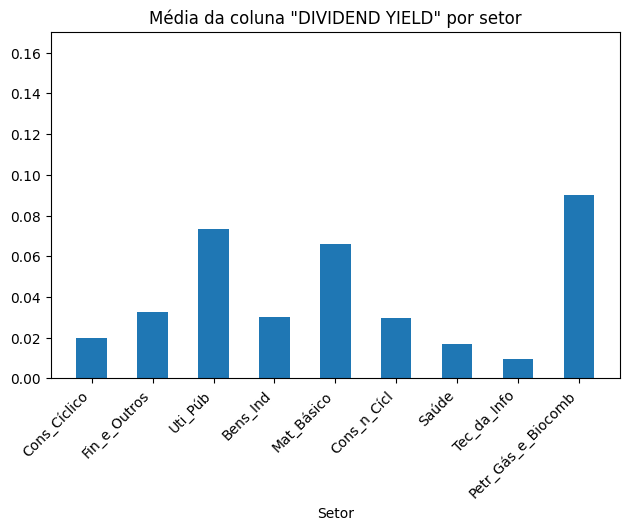

In [40]:
# Gráfico da média de Dividend Yield de ações

import matplotlib.pyplot as plt

cont = 0
medias = []

for c in ma:
    # Verifique a estrutura dos dados e as colunas corretas
    if 'DIVIDEND YIELD' in c:
        media = c['DIVIDEND YIELD'].mean()
        medias.append(media)
    else:
        medias.append(0)  # Trate o caso em que a coluna não existe ou não tem valores

    cont += 1

plt.bar(ma2, medias, width=0.5)
plt.xlabel('Setor')
#plt.ylabel('Média da coluna "DIVIDEND YIELD"')
plt.title('Média da coluna "DIVIDEND YIELD" por setor')
plt.xticks(rotation=45, ha='right')
plt.ylim(top=0.170)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Ajusta o espaço inferior para acomodar os rótulos

plt.show()

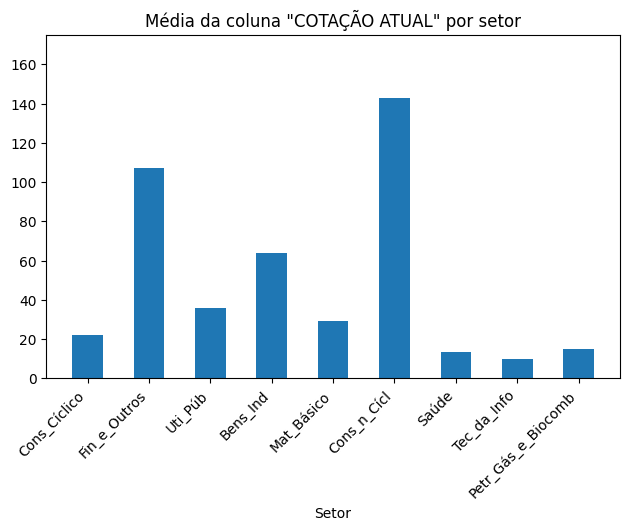

In [41]:
# Gráfico da média de Cotação atual de ações

cont = 0
medias = []

for c in ma:
    if 'COTAÇÃO ATUAL' in c:
        media = c['COTAÇÃO ATUAL'].mean()
        medias.append(media)
    else:
        medias.append(0)

    cont += 1

plt.bar(ma2, medias, width=0.5)
plt.xlabel('Setor')
#plt.ylabel('Média da coluna "COTAÇÃO ATUAL"')
plt.title('Média da coluna "COTAÇÃO ATUAL" por setor')
plt.xticks(rotation=45, ha='right')
plt.ylim(top=175)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2) 
plt.show()

In [42]:
# Verificar se as variáveis estão no formato correto
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 0 to 595
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CÓDIGO              596 non-null    object 
 1   TIPO                596 non-null    object 
 2   SETOR               596 non-null    object 
 3   COTAÇÃO ATUAL       596 non-null    float64
 4   PREÇO MÍNIMO        596 non-null    float64
 5   PREÇO MÁXIMO        596 non-null    float64
 6   DIVIDEND YIELD      596 non-null    float64
 7   LIQUIDEZ DIÁRIA     596 non-null    float64
 8   P/VP                596 non-null    float64
 9   CAGR LUCRO          596 non-null    float64
 10  PATRIMÔNIO LÍQUIDO  596 non-null    float64
 11  CAIXA               596 non-null    float64
 12  LUCRO               596 non-null    float64
 13  INVESTIR            596 non-null    int64  
dtypes: float64(10), int64(1), object(3)
memory usage: 69.8+ KB


In [43]:
#display(Híbrido)

#Possíveis outliers
#tirar ERCR11

#display(Lajes_Corp)
#tirar BLMO11, BBFI11B(analisar) 

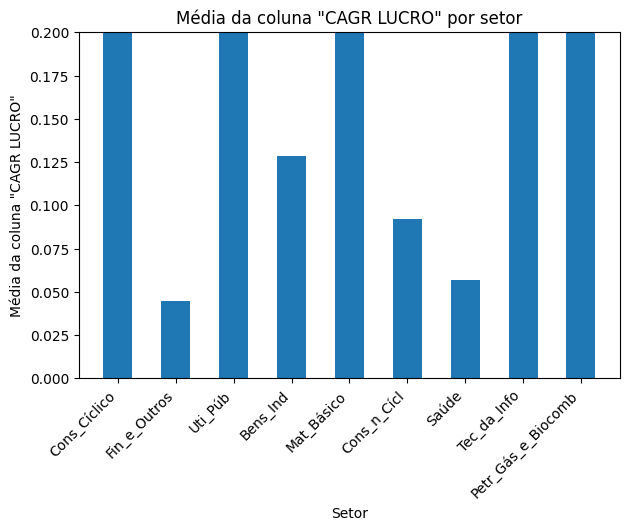

In [44]:
#Gráfico da média de CAGR LUCRO de ações
cont = 0
medias = []

for c in ma:
    if 'CAGR LUCRO' in c:
        media = c['CAGR LUCRO'].mean()
        medias.append(media)
    else:
        medias.append(0)

    cont += 1

plt.bar(ma2, medias, width=0.5)
plt.xlabel('Setor')
plt.ylabel('Média da coluna "CAGR LUCRO"')
plt.title('Média da coluna "CAGR LUCRO" por setor')
plt.xticks(rotation=45, ha='right')
plt.ylim(top=0.2)#, bottom=-0.20
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

<AxesSubplot: ylabel='Frequency'>

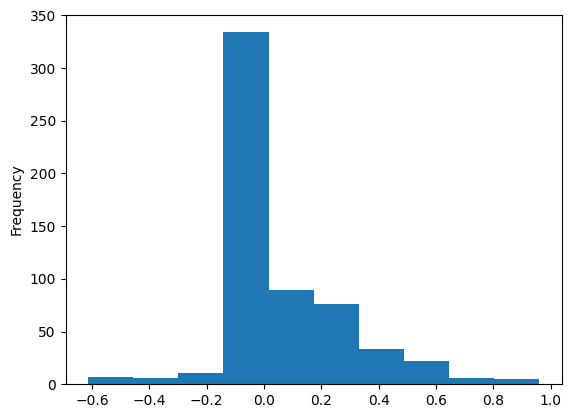

In [45]:
# Localizar as maiores incidências de CAGR 
df['CAGR LUCRO'].loc[lambda x : (x > -1.0) & (x <= 1.0)].plot.hist()

In [46]:
#Possíveis outliers

#display(Cons_Cíclico)
#tirar MYPK3

#display(Uti_Púb)
#tirar CPRE3, ENMT3, ENMT4

#display(Mat_Básico)
#tirar CSNA3

#display(Tec_da_Info)
#tirar BRQB3

#display(Petr_Gás_e_Biocomb)
#tirar PRIO3

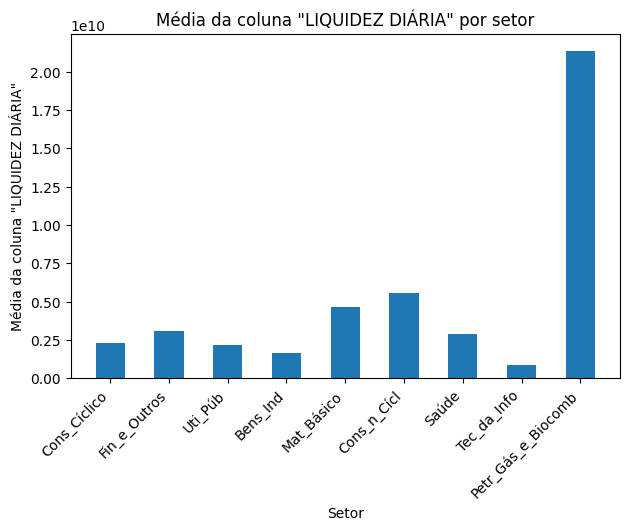

In [47]:
# Gráfico de detalhamento de LIQUIDEZ DIÁRIA
cont = 0
medias = []

for c in ma:
    if 'LIQUIDEZ DIÁRIA' in c:
        media = c['LIQUIDEZ DIÁRIA'].mean()
        medias.append(media)
    else:
        medias.append(0)

    cont += 1

# Plotando o gráfico
plt.bar(ma2, medias, width=0.5)
plt.xlabel('Setor')
plt.ylabel('Média da coluna "LIQUIDEZ DIÁRIA"')
plt.title('Média da coluna "LIQUIDEZ DIÁRIA" por setor')
plt.xticks(rotation=45, ha='right')
#plt.ylim(top=1)#, bottom=-0.20
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

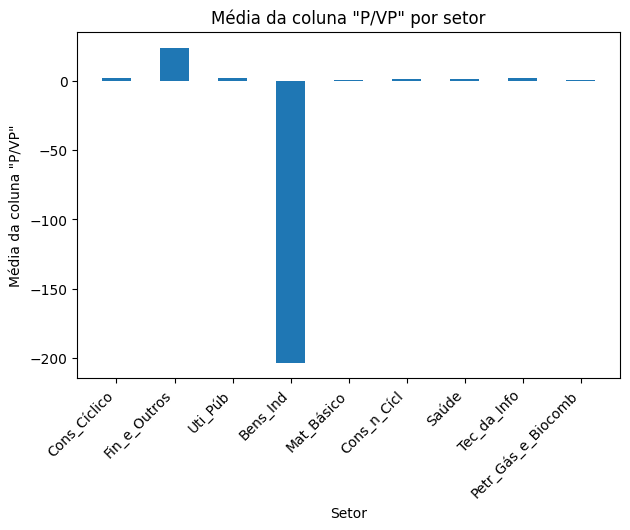

In [48]:
# Gráfico de detalhamento de P/VP por setor
cont = 0
medias = []

for c in ma:
    if 'P/VP' in c:
        media = c['P/VP'].mean()
        medias.append(media)
    else:
        medias.append(0)

    cont += 1

plt.bar(ma2, medias, width=0.5)
plt.xlabel('Setor')
plt.ylabel('Média da coluna "P/VP"')
plt.title('Média da coluna "P/VP" por setor')
plt.xticks(rotation=45, ha='right')
#plt.ylim(top=25, bottom=-0.20)#
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

In [49]:
#possíveis outliers

#display(Fin_e_Outros)
# tirar BTTL4, PPLA11, SPRT3B

#display(Bens_Ind)
#tirar BBML3, DTCY3, DTCY4, RCSL3, SHUL3, WEGE3, MYPK3

#display(Uti_Púb)
#tirar CPRE3, ENMT3, ENMT4

#display(Mat_Básico)
#tirar CSNA3

#display(Tec_da_Info)
#tirar BRQB3

#display(Petr_Gás_e_Biocomb)
#tirar PRIO3'''

C:\Users\elysi\AppData\Local\Temp\ipykernel_23760\1901669489.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


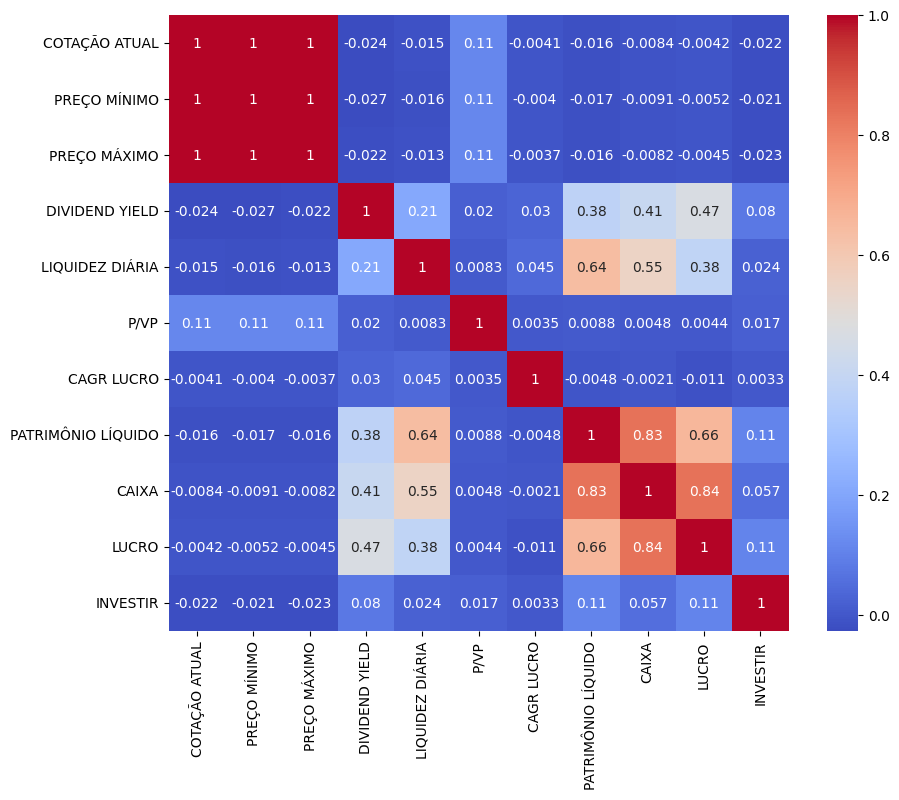

In [50]:
# Calcular a matriz de correlação para entender quais as variáveis são mais relevantes filtrando apenas ações
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()


In [51]:
# Filtrar apenas fundos para análise mais profunda
df2 = dfx[dfx['TIPO'] == 'FUNDO']
display(df2)

,CÓDIGO,TIPO,SETOR,COTAÇÃO ATUAL,PREÇO MÍNIMO,PREÇO MÁXIMO,DIVIDEND YIELD,LIQUIDEZ DIÁRIA,P/VP,CAGR LUCRO,PATRIMÔNIO LÍQUIDO,CAIXA,LUCRO,INVESTIR
596,AAZQ11,FUNDO,Fiagro,9.40,9.23,10.03,0.0457,57426924.0,0.98,0.0000,2.310728e+08,4.723716e+08,0.0,1
597,ABCP11,FUNDO,Shoppings,66.66,63.99,76.12,0.0905,5015774.0,0.73,-0.0705,4.318247e+08,7.116864e+08,0.0,0
598,AFHI11,FUNDO,Títulos e Val. Mob.,92.17,92.17,107.00,0.1489,58942679.0,0.97,0.0000,2.866475e+08,2.231534e+09,0.0,1
599,AGRX11,FUNDO,Fiagro,10.87,9.17,10.88,0.0957,11451494.0,1.06,0.0000,6.626857e+07,6.643529e+09,0.0,1
600,AIEC11,FUNDO,Lajes Corporativas,60.26,59.48,81.30,0.1480,3657375.0,0.64,0.0000,4.547335e+08,2.672148e+08,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,JGPX11,FUNDO,Híbrido,96.70,94.21,98.90,0.1493,12728271.0,1.00,0.0000,8.171437e+07,2.913302e+08,0.0,1
893,JPPA11,FUNDO,Títulos e Val. Mob.,93.25,90.47,109.30,0.2072,35115949.0,0.95,-0.0062,8.896746e+07,7.023743e+07,0.0,0
894,JRDM11,FUNDO,Shoppings,78.79,75.25,87.93,0.0932,2534089.0,0.89,0.0312,2.233239e+08,1.787602e+08,0.0,0
895,JSAF11,FUNDO,Títulos e Val. Mob.,84.50,76.14,94.75,0.1324,40772397.0,0.93,0.0000,1.419765e+08,1.838065e+09,0.0,1


In [52]:
#Verificar as dimensões dos dados
df2.shape

(301, 14)

In [53]:
#Verificar os tipos dos dados para buscar e corrigir inconsistências
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 596 to 896
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CÓDIGO              301 non-null    object 
 1   TIPO                301 non-null    object 
 2   SETOR               301 non-null    object 
 3   COTAÇÃO ATUAL       301 non-null    float64
 4   PREÇO MÍNIMO        301 non-null    float64
 5   PREÇO MÁXIMO        301 non-null    float64
 6   DIVIDEND YIELD      301 non-null    float64
 7   LIQUIDEZ DIÁRIA     301 non-null    float64
 8   P/VP                301 non-null    float64
 9   CAGR LUCRO          301 non-null    float64
 10  PATRIMÔNIO LÍQUIDO  301 non-null    float64
 11  CAIXA               301 non-null    float64
 12  LUCRO               301 non-null    float64
 13  INVESTIR            301 non-null    int64  
dtypes: float64(10), int64(1), object(3)
memory usage: 35.3+ KB


In [54]:
#Entendendo melhor a variável "Setor" dos fundos imobiliários
df2.value_counts(df2['SETOR'])

SETOR
Títulos e Val. Mob.    126
Híbrido                 50
Lajes Corporativas      40
Logística               22
Shoppings               22
Fiagro                  13
Residencial             12
Outros                   8
Hospital                 4
Hotel                    3
Renda                    1
dtype: int64

In [55]:
#filtro dos fundos

#setores fundos
Tit_e_Val_Mob = df2[df2['SETOR'] == 'Títulos e Val. Mob.']
Laj_Corp = df2[df2['SETOR'] == 'Lajes Corporativas']
Hotel = df2[df2['SETOR'] == 'Hotel']
Residencial = df2[df2['SETOR'] == 'Residencial']
Hospital = df2[df2['SETOR'] == 'Hospital']
Fiagro = df2[df2['SETOR'] == 'Fiagro']
Shoppings = df2[df2['SETOR'] == 'Shoppings']
Outros = df2[df2['SETOR'] == 'Outros']
Hotel = df2[df2['SETOR'] == 'Logística']
Renda = df2[df2['SETOR'] == 'Renda']
Híbrido = df2[df2['SETOR'] == 'Híbrido']

mf=[]
mf.append(Tit_e_Val_Mob)
mf.append(Laj_Corp)
mf.append(Hotel)
mf.append(Residencial)
mf.append(Hospital)
mf.append(Fiagro)
mf.append(Shoppings)
mf.append(Outros)
mf.append(Hotel)
mf.append(Renda)
mf.append(Híbrido)

mf2=[]

mf2.append('Tit_e_Val_Mob')
mf2.append('Laj_Corp')
mf2.append('Hotel')
mf2.append('Residencial')
mf2.append('Hospital')
mf2.append('Fiagro')
mf2.append('Shoppings')
mf2.append('Outros')
mf2.append('Hotel')
mf2.append('Renda')
mf2.append('Híbrido')

#display(mf)

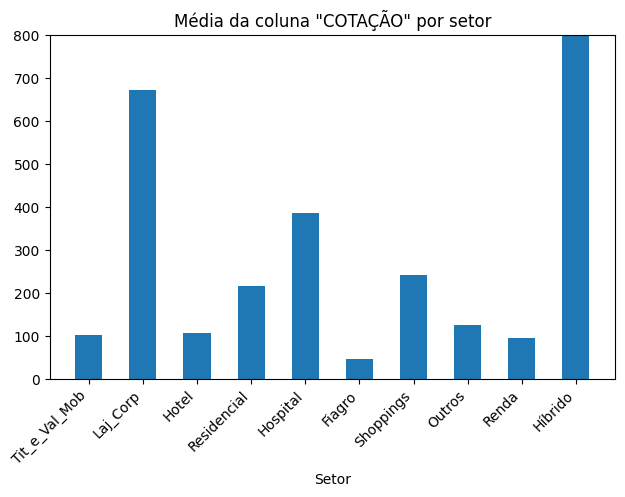

In [56]:
#Detalhamento da categoria "Cotação"
cont = 0
medias = []

for c in mf:
    if 'COTAÇÃO ATUAL' in c:
        media = c['COTAÇÃO ATUAL'].mean()
        medias.append(media)
    else:
        medias.append(0)

    cont += 1

plt.bar(mf2, medias, width=0.5)
plt.xlabel('Setor')
#plt.ylabel('Média da coluna "COTAÇÃO"')
plt.title('Média da coluna "COTAÇÃO" por setor')
plt.xticks(rotation=45, ha='right')
plt.ylim(top=800, bottom=0)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()


In [57]:
# Possíveis outliars

#display(Híbrido)
#excluir STRX11, ERCR11

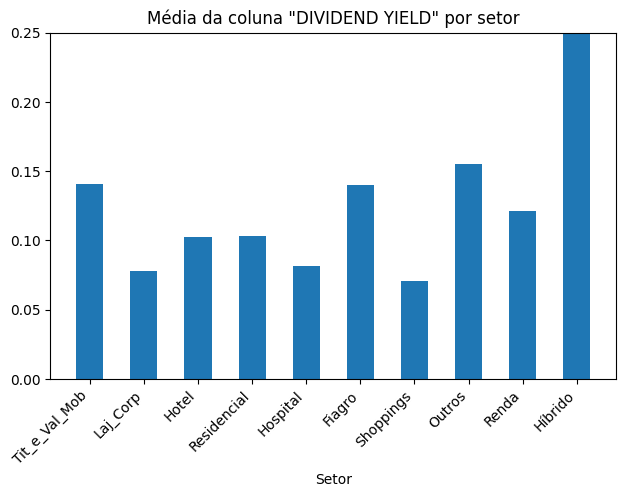

In [58]:
# Gráfico de detalhamento do DY
cont = 0
medias = []

for c in mf:
    if 'DIVIDEND YIELD' in c:
        media = c['DIVIDEND YIELD'].mean()
        medias.append(media)
    else:
        medias.append(0)

    cont += 1

# Plotando o gráfico
plt.bar(mf2, medias, width=0.5)
plt.xlabel('Setor')
#plt.ylabel('Média da coluna "DIVIDEND YIELD"')
plt.title('Média da coluna "DIVIDEND YIELD" por setor')
plt.xticks(rotation=45, ha='right')
plt.ylim(top=0.25)#, bottom=-0.20
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

In [59]:
# Média de cagr dos fundos
cont = 0
for c in mf:
    media = c['CAGR LUCRO'].mean()
    #print(c)
    print("Média da coluna 'CAGR LUCRO' do setor {}:\033[1;32m".format(mf2[cont]), media, '\033[m')
    cont += 1

# Nenhum setor de Fundos tem média de evolução do lucro positiva, o que representa um risco para os investimentos.

Média da coluna 'CAGR LUCRO' do setor Tit_e_Val_Mob: -0.04077063492063492 
Média da coluna 'CAGR LUCRO' do setor Laj_Corp: -0.10898 
Média da coluna 'CAGR LUCRO' do setor Hotel: -0.02445909090909091 
Média da coluna 'CAGR LUCRO' do setor Residencial: -0.11235833333333334 
Média da coluna 'CAGR LUCRO' do setor Hospital: -0.061024999999999996 
Média da coluna 'CAGR LUCRO' do setor Fiagro: 0.0 
Média da coluna 'CAGR LUCRO' do setor Shoppings: -0.04665 
Média da coluna 'CAGR LUCRO' do setor Outros: -0.12378750000000001 
Média da coluna 'CAGR LUCRO' do setor Hotel: -0.02445909090909091 
Média da coluna 'CAGR LUCRO' do setor Renda: 0.0 
Média da coluna 'CAGR LUCRO' do setor Híbrido: -0.05145599999999999 


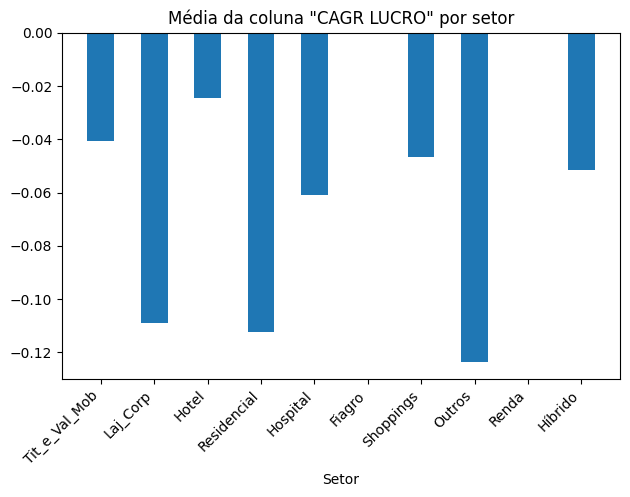

In [60]:
# Detalhamento do CAGR por setor
cont = 0
medias = []

for c in mf:
    if 'CAGR LUCRO' in c:
        media = c['CAGR LUCRO'].mean()
        medias.append(media)
    else:
        medias.append(0)

    cont += 1

plt.bar(mf2, medias, width=0.5)
plt.xlabel('Setor')
#plt.ylabel('Média da coluna "CAGR LUCRO"')
plt.title('Média da coluna "CAGR LUCRO" por setor')
plt.xticks(rotation=45, ha='right')
#plt.ylim(top=0.2)#, bottom=-0.20
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

<AxesSubplot: ylabel='Frequency'>

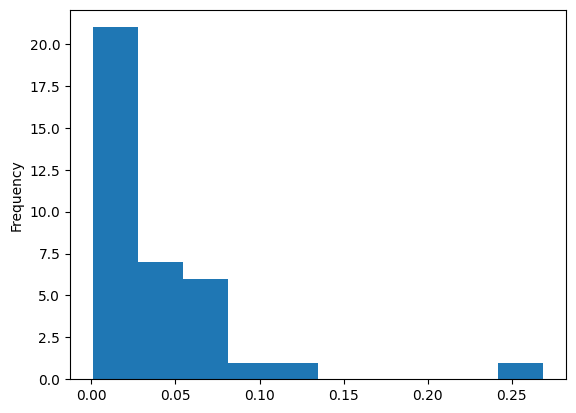

In [61]:
# Localizar concentração de CAGR > 0
df2['CAGR LUCRO'].loc[lambda x : (x > 0) & (x <= 1.0)].plot.hist()

In [62]:
#FILTRAR O CAGR DOS FUNDOS PARA COMPREENDER A MÉDIA DE CAGR DE FUNDOS !=0
cagr_melhores_f = df2[df2['CAGR LUCRO'] != 0] 

#Média do CAGR dos fundos, excluindo os valores 0
display(cagr_melhores_f['CAGR LUCRO'].mean())
cagr_melhores_f.shape

-0.09504294117647058

(170, 14)

In [63]:
#Visualizar o setor com maior ocorrências em detalhes
display(Outros)

,CÓDIGO,TIPO,SETOR,COTAÇÃO ATUAL,PREÇO MÍNIMO,PREÇO MÁXIMO,DIVIDEND YIELD,LIQUIDEZ DIÁRIA,P/VP,CAGR LUCRO,PATRIMÔNIO LÍQUIDO,CAIXA,LUCRO,INVESTIR
634,BTAL11,FUNDO,Outros,89.03,81.89,102.40,0.1119,7.279455e+07,0.85,0.0000,6.290536e+08,1.840927e+09,0.0,1
656,CXAG11,FUNDO,Outros,76.48,74.27,81.75,0.1216,1.005711e+07,0.67,0.0000,2.400524e+08,1.834514e+06,0.0,1
657,CXCE11B,FUNDO,Outros,39.99,36.07,42.47,0.1171,2.450197e+06,0.61,-0.2391,1.116284e+08,7.268390e+08,0.0,0
675,FAED11,FUNDO,Outros,141.24,132.36,161.97,0.1325,6.265200e+04,0.65,-0.1127,1.397393e+08,2.393509e+08,0.0,0
678,FCFL11,FUNDO,Outros,104.87,98.92,131.00,0.0931,3.786555e+07,0.90,-0.0067,4.036574e+08,2.466113e+08,0.0,0
706,HCTR11,FUNDO,Outros,52.63,52.50,116.30,0.2654,1.034893e+09,0.44,-0.2246,2.620721e+09,1.239913e+09,0.0,0
736,RBOP11,FUNDO,Outros,430.00,415.00,708.90,0.2907,8.447794e+06,0.56,-0.2773,7.841155e+07,5.504327e+07,0.0,0
811,XPIN11,FUNDO,Outros,69.83,67.71,86.70,0.1087,4.035608e+07,0.68,-0.1299,7.376699e+08,2.295451e+09,0.0,0


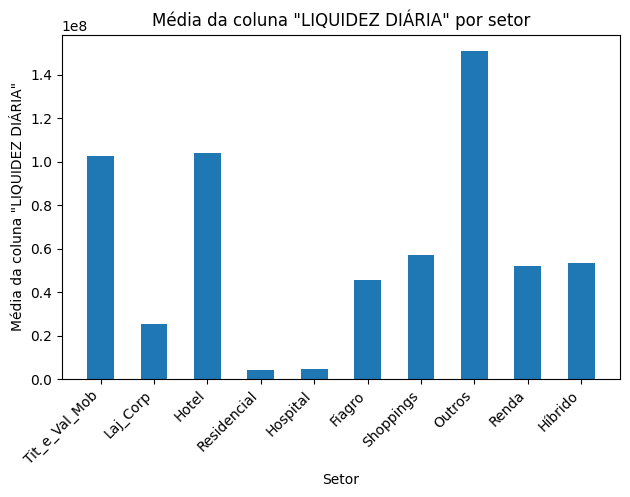

In [64]:
# DETALHE DE LIQUIDEZ DIÁRIA POR SETOR
cont = 0
medias = []

for c in mf:
    if 'LIQUIDEZ DIÁRIA' in c:
        media = c['LIQUIDEZ DIÁRIA'].mean()
        medias.append(media)
    else:
        medias.append(0)

    cont += 1

plt.bar(mf2, medias, width=0.5)
plt.xlabel('Setor')
plt.ylabel('Média da coluna "LIQUIDEZ DIÁRIA"')
plt.title('Média da coluna "LIQUIDEZ DIÁRIA" por setor')
plt.xticks(rotation=45, ha='right')
#plt.ylim(top=10000000)#, bottom=-0.20
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

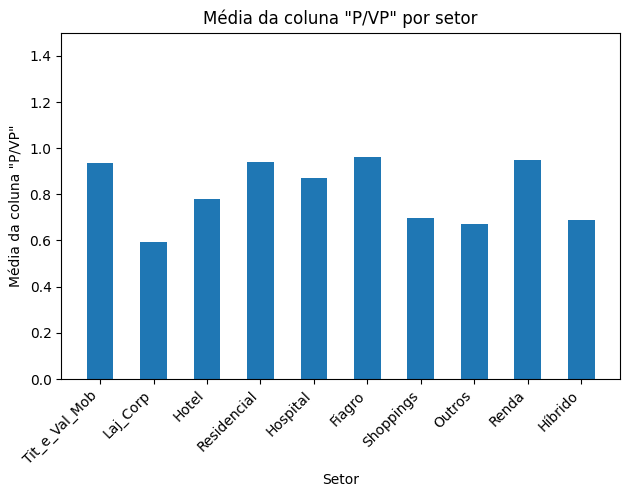

In [65]:
# GRÁFICO DE P/VP POR SETOR

cont = 0
medias = []

for c in mf:
    if 'P/VP' in c:
        media = c['P/VP'].mean()
        medias.append(media)
    else:
        medias.append(0)

    cont += 1

plt.bar(mf2, medias, width=0.5)
plt.xlabel('Setor')
plt.ylabel('Média da coluna "P/VP"')
plt.title('Média da coluna "P/VP" por setor')
plt.xticks(rotation=45, ha='right')
plt.ylim(top=1.5)#, bottom=-0.20
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

In [66]:
#Criação da variável preditora em python ( NÃO SERÁ MAIS NECESSÁRIO PORQUE CONVERTEMOS A VARIÁVEL PREDITORA EM 0 E 1)
'''atributo_filtro = []


def analise(varpred, atributo):
    for valor in varpred[atributo]:
        if atributo == 'DIVIDEND YIELD':
            if valor > 0.06:
                atributo_filtro.append('Sim')
            else:
                atributo_filtro.append('Não')
                
        elif atributo == 'LIQUIDEZ DIÁRIA':
            if valor > 1000000:
                atributo_filtro.append('Sim')
            else:
                atributo_filtro.append('Não')
                
        elif atributo == 'P/VP':
            if valor < 1.2 and valor > 0.3:
                atributo_filtro.append('Sim')
            else:
                atributo_filtro.append('Não')
                
        elif atributo == 'CAGR LUCRO':
            if valor > 0.05:
                atributo_filtro.append('Sim')
            else:
                atributo_filtro.append('Não')
            
    varpred['analise',atributo] = atributo_filtro
    print(varpred.value_counts(varpred['analise', atributo]))
    display(varpred)
    
analise(dfx, 'CAGR LUCRO')'''

"atributo_filtro = []\n\n\ndef analise(varpred, atributo):\n    for valor in varpred[atributo]:\n        if atributo == 'DIVIDEND YIELD':\n            if valor > 0.06:\n                atributo_filtro.append('Sim')\n            else:\n                atributo_filtro.append('Não')\n                \n        elif atributo == 'LIQUIDEZ DIÁRIA':\n            if valor > 1000000:\n                atributo_filtro.append('Sim')\n            else:\n                atributo_filtro.append('Não')\n                \n        elif atributo == 'P/VP':\n            if valor < 1.2 and valor > 0.3:\n                atributo_filtro.append('Sim')\n            else:\n                atributo_filtro.append('Não')\n                \n        elif atributo == 'CAGR LUCRO':\n            if valor > 0.05:\n                atributo_filtro.append('Sim')\n            else:\n                atributo_filtro.append('Não')\n            \n    varpred['analise',atributo] = atributo_filtro\n    print(varpred.value_counts(va

C:\Users\elysi\AppData\Local\Temp\ipykernel_23760\1290905927.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


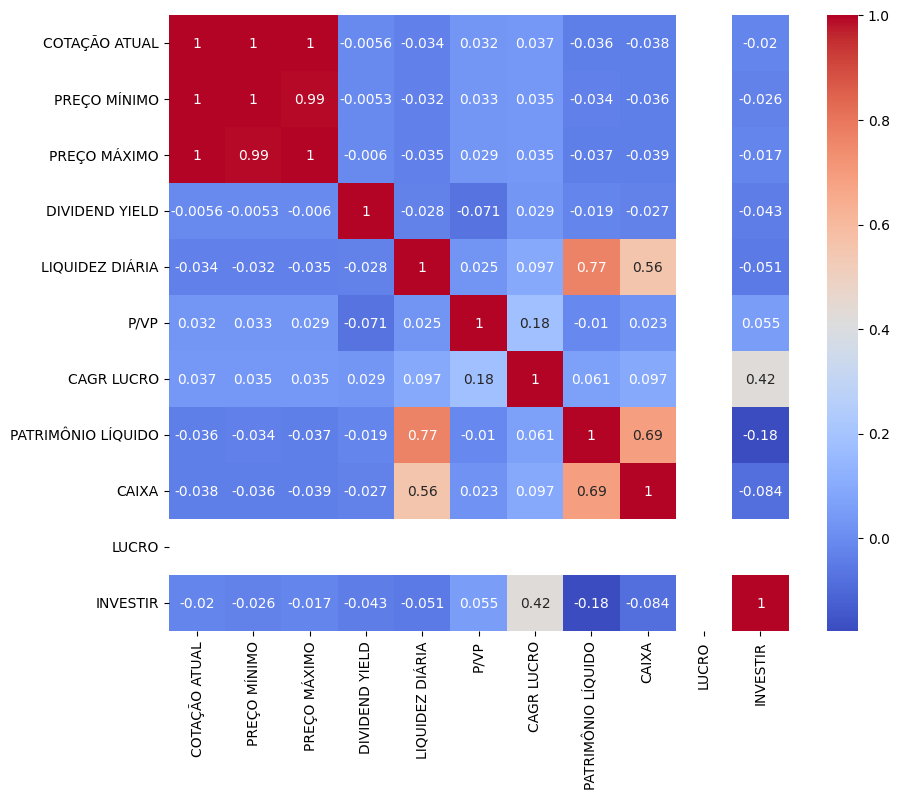

In [67]:
# Calcular a matriz de correlação para entender quais as variáveis são mais relevantes (LUCRO = 0 NA MAIOR PARTE DAS INSTÂNCIAS)
correlation_matrix = df2.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()


In [68]:
# Contar as instâncias da variável (Lucro)
df2['LUCRO'].value_counts()

0.0    301
Name: LUCRO, dtype: int64

In [69]:
# Redução do dataset para preparação dos modelos

df1 = dfx[['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO', 'INVESTIR']]

#display(df1)


In [70]:
## Resumo Estatistico antes da remoção de outliers
df1.describe()

# A Princípio notamos uma amplitude muito elevada e, por consequência um Std muito elevado também. 
# Outro ponto que chama a atenção é a média de P/VP -13.89 (valor muito baixo, possível outlier puxando a média para baixo)

,DIVIDEND YIELD,LIQUIDEZ DIÁRIA,P/VP,CAGR LUCRO,INVESTIR
count,897.000000,8.970000e+02,897.000000,897.000000,897.000000
mean,11.972240,2.186699e+09,-13.894627,121.678218,0.284281
std,356.626053,1.031151e+10,593.494660,1407.407782,0.451323
min,0.000000,0.000000e+00,-17420.220000,-0.629200,0.000000
25%,0.000000,2.576180e+05,0.470000,0.000000,0.000000
50%,0.047300,1.064489e+07,0.860000,0.000000,0.000000
75%,0.108700,2.205774e+08,1.250000,0.059500,1.000000
max,10681.000000,1.801726e+11,2343.690000,20159.000000,1.000000


In [71]:
#Normailizar apenas a coluna 'LIQUIDEZ DIÁRIA', porque nela não há valor abaixo de zero e os valores exorbitantes não devem ser 
# considerados outlier. Vimos na análise exploratória que os valores dessa coluna podem ser altos devido ao setor de Petróleo e gás

from sklearn.preprocessing import MinMaxScaler

def normalize_column(df1, column_name):
    scaler = MinMaxScaler(feature_range=(0, 1))
    df1[column_name] = scaler.fit_transform(df1[[column_name]])
    return df1

# Exemplo de uso
df_normalized = normalize_column(df1, 'LIQUIDEZ DIÁRIA')

C:\Users\elysi\AppData\Local\Temp\ipykernel_23760\3357911586.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column_name] = scaler.fit_transform(df1[[column_name]])


In [72]:
# Notamos valores estranhos no P/VP. Valores muito negativos indicam que a empresa não é uma boa opção de investimento, 
# logo não há problema em ser desconsiderada no dataset. 
print(df_normalized)

     DIVIDEND YIELD  LIQUIDEZ DIÁRIA  P/VP  CAGR LUCRO  INVESTIR
0            0.0000         0.004462  2.73      0.0000         0
1            0.0649         0.000692  0.72      0.1336         1
2            0.0520         0.261416  2.77      0.1474         0
3            0.0000         0.000000 -1.29      0.0000         0
4            0.0000         0.003352  1.17      0.0000         1
..              ...              ...   ...         ...       ...
892          0.1493         0.000071  1.00      0.0000         1
893          0.2072         0.000195  0.95     -0.0062         0
894          0.0932         0.000014  0.89      0.0312         0
895          0.1324         0.000226  0.93      0.0000         1
896          0.0882         0.001136  0.59     -0.1289         0

[897 rows x 5 columns]


In [73]:
# Resumo estatistico do df normalizado
df_normalized.describe()

,DIVIDEND YIELD,LIQUIDEZ DIÁRIA,P/VP,CAGR LUCRO,INVESTIR
count,897.000000,897.000000,897.000000,897.000000,897.000000
mean,11.972240,0.012137,-13.894627,121.678218,0.284281
std,356.626053,0.057231,593.494660,1407.407782,0.451323
min,0.000000,0.000000,-17420.220000,-0.629200,0.000000
25%,0.000000,0.000001,0.470000,0.000000,0.000000
50%,0.047300,0.000059,0.860000,0.000000,0.000000
75%,0.108700,0.001224,1.250000,0.059500,1.000000
max,10681.000000,1.000000,2343.690000,20159.000000,1.000000


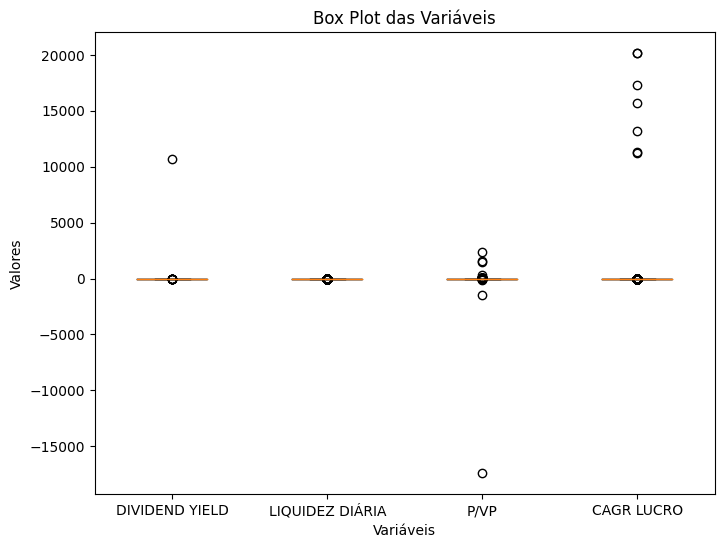

In [74]:
#Ver a distribuição inicial numa boxplot

import matplotlib.pyplot as plt

#box plot
plt.figure(figsize=(8, 6))
plt.boxplot([df_normalized['DIVIDEND YIELD'], df_normalized['LIQUIDEZ DIÁRIA'], df_normalized['P/VP'], df_normalized['CAGR LUCRO']])
plt.xticks([1, 2, 3, 4], ['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO'])
plt.title('Box Plot das Variáveis')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.show()

In [75]:
#Remoção de outlier Método IQR 

'''Q1 = df_normalized.quantile(0.25)
Q3 = df_normalized.quantile(0.75)
IQR = Q3 - Q1
df_final = df_normalized[~((df_normalized < (Q1 - 1.5 * IQR)) | (df_normalized > (Q3 + 1.5 * IQR)))]

display(df_final)'''
# O método não removeu nenhum valor, por isso não parece ser viável

'Q1 = df_normalized.quantile(0.25)\nQ3 = df_normalized.quantile(0.75)\nIQR = Q3 - Q1\ndf_final = df_normalized[~((df_normalized < (Q1 - 1.5 * IQR)) | (df_normalized > (Q3 + 1.5 * IQR)))]\n\ndisplay(df_final)'

In [76]:
# Método hampel

'''def remove_outlier_Hampel(df_normalized):
    for column in ['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO']:
        med = df_normalized[column].median()
        List = abs(df_normalized[column] - med)
        cond = List.median() * 4.5
        df_normalized = df_normalized[~(List > cond)]
    return df_normalized


# Remove outliers utilizando a função remove_outlier_Hampel
df_cleaned = remove_outlier_Hampel(df_normalized)

# Criar o box plot com as variáveis desejadas
import seaborn as sns
import matplotlib.pyplot as plt

# Remoção de outliers
df_cleaned = remove_outlier_Hampel(df_normalized)

# Criação do boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned[['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO']])
plt.xticks(rotation=90)
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.title('Boxplot das Variáveis')
plt.show()
df_cleaned.describe()'''

# Método hampel deixou apenas 252 instâncias, o que entendemos ser um número baixo para trabalhar

"def remove_outlier_Hampel(df_normalized):\n    for column in ['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO']:\n        med = df_normalized[column].median()\n        List = abs(df_normalized[column] - med)\n        cond = List.median() * 4.5\n        df_normalized = df_normalized[~(List > cond)]\n    return df_normalized\n\n\n# Remove outliers utilizando a função remove_outlier_Hampel\ndf_cleaned = remove_outlier_Hampel(df_normalized)\n\n# Criar o box plot com as variáveis desejadas\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Remoção de outliers\ndf_cleaned = remove_outlier_Hampel(df_normalized)\n\n# Criação do boxplot\nplt.figure(figsize=(8, 6))\nsns.boxplot(data=df_cleaned[['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO']])\nplt.xticks(rotation=90)\nplt.xlabel('Variáveis')\nplt.ylabel('Valores')\nplt.title('Boxplot das Variáveis')\nplt.show()\ndf_cleaned.describe()"

In [77]:
#Remover outliers com função específica

def remove_rows(df1):
    condition = (df1['DIVIDEND YIELD'] > 1) | (df1['P/VP'] > 2) | (df1['P/VP'] < -0.5) | (df1['CAGR LUCRO'] > 2) | (df1['CAGR LUCRO'] < -1)
    df_filtered = df1[~condition]
    return df_filtered
# Restaram 736 variáveis, esta é a melhor opção para remoção de outliers

In [78]:
#Exibir o dataset reduzido (161 estâncias retiradas)
df_final = remove_rows(df1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736 entries, 1 to 896
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DIVIDEND YIELD   736 non-null    float64
 1   LIQUIDEZ DIÁRIA  736 non-null    float64
 2   P/VP             736 non-null    float64
 3   CAGR LUCRO       736 non-null    float64
 4   INVESTIR         736 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 34.5 KB


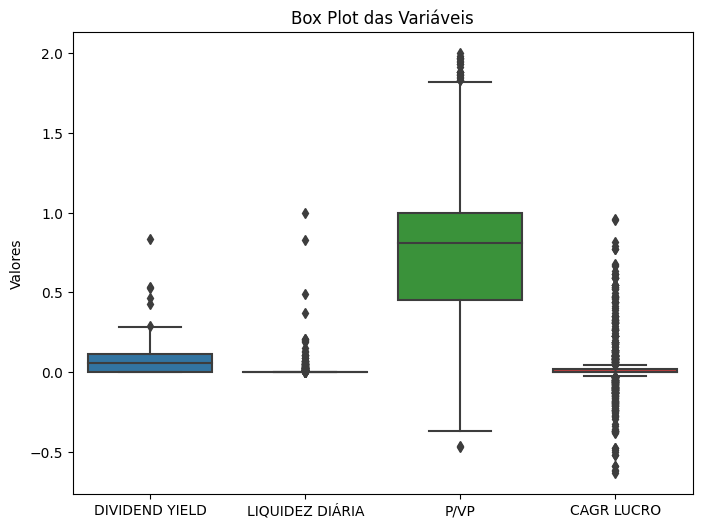

In [79]:
#Exibir plot após a remoção dos outliers(aparentemente nenhum dos métodos atingiu a expectativa, devido a composição das suas fórumulas)
    
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_final[['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO']])
plt.title('Box Plot das Variáveis')
plt.ylabel('Valores')
plt.show()

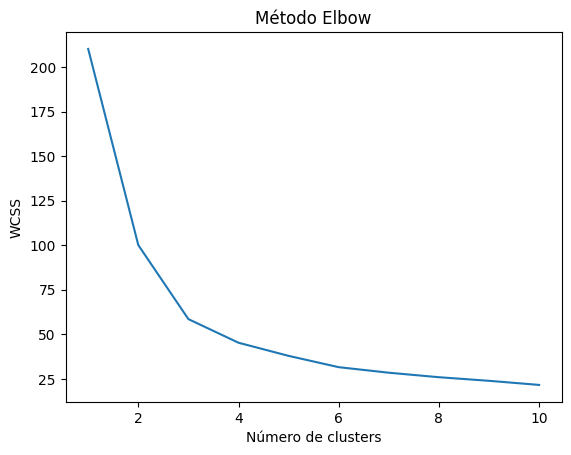

O número óptimo de clusters é 4


In [80]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

#Inicialização do WCSS
wcss = []

#Experimentar o algoritmo K-Means com K a variar entre 1 e 10 e considerando a variante 'k-means++' para eliminar o problema da inicialização dos centróides
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df_final[['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO']])
    wcss.append(kmeans.inertia_)
    
#Visualizar a variação do WCSS nos 10 clusters
plt.plot(range(1, 11), wcss)
plt.title('Método Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

print("O número óptimo de clusters é 4")

In [81]:
# Testando o K-means para localizar os clusters (Resultado não é claro)
# Selecionando as colunas relevantes do dataset
#X = df_final[['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO']].values

'''# Executando o K-means para o número ideal de clusters
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Plotando os clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters')
plt.xlabel('Variáveis')
plt.legend()
plt.show()
'''

"# Executando o K-means para o número ideal de clusters\nkmeans = KMeans(n_clusters=3, random_state=0)\ny_kmeans = kmeans.fit_predict(X)\n\n# Plotando os clusters\nplt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')\nplt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')\nplt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')\nplt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')\nplt.title('Clusters')\nplt.xlabel('Variáveis')\nplt.legend()\nplt.show()\n"

In [82]:
# Selecionando as colunas relevantes do dataset
X = df_final[['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO']].values
y = df_final[['INVESTIR']].values

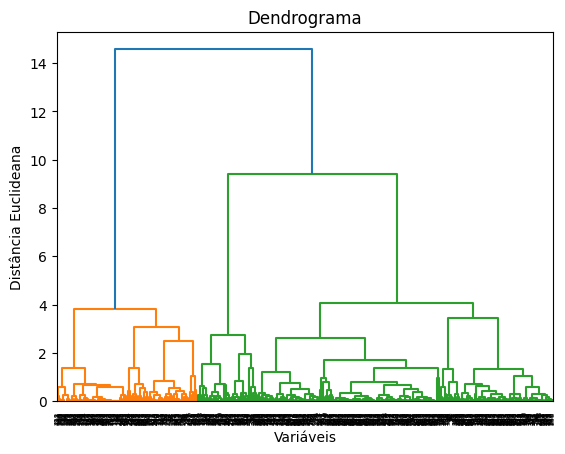

In [83]:
#Pela análise do dendograma consideramos 4 clusters
import scipy.cluster.hierarchy as sch

#O método 'linkage'permite definir a técnica de clustering a utilizar. Aqui utilizamos a métrica da minimização da variância dentro dos clusters chamada 'ward'
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Variáveis')
plt.ylabel('Distância Euclideana')
plt.show()

In [84]:
#Impressão de valores
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
print(y_hc)

[1 3 3 2 3 0 3 3 1 2 1 1 1 0 2 0 0 1 0 0 0 2 3 0 3 3 1 1 1 1 3 1 0 0 3 3 0
 0 3 0 3 3 3 0 0 1 1 0 1 0 1 3 1 2 0 2 1 3 3 0 3 2 2 0 0 1 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 2 2 2 2 1 3 0 0 1 1 0 0 3 3 3 1 0 2 2 2 1 1 1 1 1 3 2 1 1 2
 2 0 0 3 3 0 0 0 0 3 3 3 0 3 1 1 2 3 3 2 1 3 0 0 0 0 0 0 0 1 1 3 3 3 2 0 3
 0 1 3 1 2 3 3 2 1 2 1 1 1 2 3 3 3 2 2 2 1 2 2 0 0 0 3 0 0 0 1 0 0 2 2 2 0
 0 3 0 2 1 2 0 0 0 0 3 3 3 3 3 0 3 3 2 0 0 0 0 2 0 0 0 0 0 0 0 2 1 0 0 0 0
 3 3 0 0 0 2 3 0 0 0 0 3 3 3 2 3 1 0 1 0 0 2 2 2 2 1 2 0 3 0 0 0 2 0 3 2 1
 0 1 3 2 0 3 0 1 3 1 3 1 2 0 0 3 0 2 3 2 2 1 0 0 0 0 1 0 0 0 0 2 1 1 0 0 0
 1 0 1 0 0 0 1 3 2 0 3 2 1 0 2 3 0 2 0 3 1 3 3 3 2 0 1 0 0 0 0 2 1 1 2 1 3
 0 2 2 2 0 0 3 1 3 0 0 2 2 3 1 1 0 2 2 0 0 0 2 0 0 0 0 2 0 0 3 3 2 1 1 1 1
 3 1 0 0 0 3 2 3 2 0 0 2 0 0 0 2 1 2 2 2 0 0 3 3 3 2 0 2 2 2 0 1 0 0 1 1 3
 2 2 3 1 1 0 1 0 3 3 3 0 0 3 2 0 0 1 2 3 1 0 3 3 1 0 0 2 0 3 3 3 3 1 3 3 1
 0 3 3 3 3 3 3 1 3 1 3 3 3 3 1 3 3 1 1 1 1 1 1 3 3 3 3 1 1 1 1 3 3 3 3 3 1
 1 0 0 0 0 0 0 3 3 1 3 0 

In [85]:
# Buscando uma melhor visualização para os clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=0)
labels = kmeans.fit_predict(X)

# Calculando o coeficiente de silhueta para cada amostra
silhouette_avg = silhouette_score(X, labels)
sample_silhouette_values = silhouette_samples(X, labels)

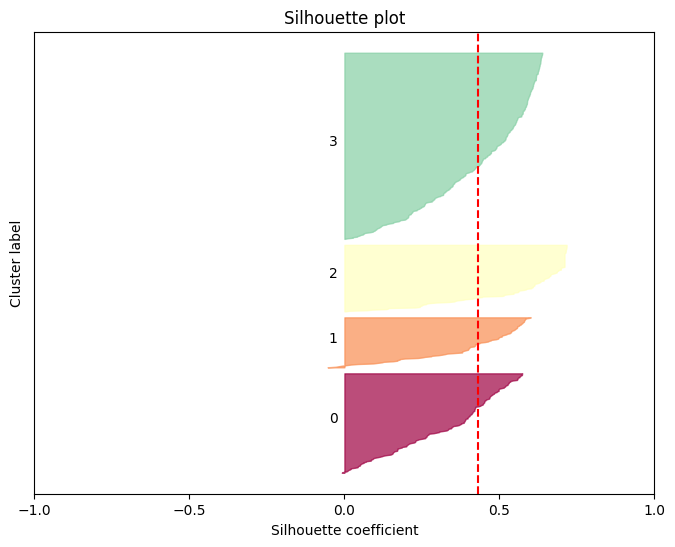

In [86]:
# Criando um gráfico para visualizar os clusters e o coeficiente de silhueta
fig, ax1 = plt.subplots()
fig.set_size_inches(8, 6)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.get_cmap("Spectral")(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax1.set_title("Silhouette plot")
ax1.set_xlabel("Silhouette coefficient")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])
ax1.set_xticks([-1, -0.5, 0, 0.5, 1])

plt.show()

In [87]:
# Visualizar valores X para o modelo
display(X)

array([[ 6.49000000e-02,  6.92399391e-04,  7.20000000e-01,
         1.33600000e-01],
       [ 0.00000000e+00,  3.35213029e-03,  1.17000000e+00,
         0.00000000e+00],
       [ 1.05000000e-02,  1.05980228e-02,  1.11000000e+00,
         0.00000000e+00],
       ...,
       [ 9.32000000e-02,  1.40647856e-05,  8.90000000e-01,
         3.12000000e-02],
       [ 1.32400000e-01,  2.26296323e-04,  9.30000000e-01,
         0.00000000e+00],
       [ 8.82000000e-02,  1.13602543e-03,  5.90000000e-01,
        -1.28900000e-01]])

In [88]:
# Visualizar valores y para o modelo (apenas 0 e 1, tudo certo)
#display(y)

array([[1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [89]:
# Criar um objeto de regressão linear

# Separando os dados em treino e teste 30% de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
regression = LinearRegression()

regression.fit(X, y)

y_pred = regression.predict(X)

mse = mean_squared_error(y, y_pred)
print("Erro quadrático médio:", mse)

print("Coeficientes:", regression.coef_)
print("Interceptação:", regression.intercept_)

#Erro quadrático médio: 0.21554719996476726
#Coeficientes: [[ 0.84041462 -0.03654904 -0.02003373  0.44630897]]
#Interceptação: [0.28764922]

Erro quadrático médio: 0.21554719996476726
Coeficientes: [[ 0.84041462 -0.03654904 -0.02003373  0.44630897]]
Interceptação: [0.28764922]


In [90]:
# Modelo Regressão logística com 30% de treino

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Acurácia:", accuracy)

# Acurácia: 0.6153846153846154

Acurácia: 0.6153846153846154


In [91]:
# Testando regressão logística com PCA (Resultado muito parecido)

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Acurácia:", accuracy)

# Acurácia: 0.6199095022624435

Acurácia: 0.6199095022624435


In [92]:
#Treinar o modelo com KNN 30% de teste(acurácia 91%)
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X,y)

neigh.score(X,y)
# com 25% de treino a acurácia cai para 81%

0.9144021739130435

In [93]:
# Modelo Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

classifier_nb = GaussianNB()

classifier_nb.fit(X_train, y_train)

y_pred = classifier_nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia Naive Bayes (30% de teste):", accuracy)
# 0.6968325791855203 (Continua abaixo de 70% mesmo alterando o random e o % de teste)

Acurácia Naive Bayes (30% de teste): 0.6968325791855203


In [94]:
# Modelo KPMN

from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import train_test_split

# Dividir os dados em conjunto de treinamento e teste (30% dos dados de teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


classifier_kpmn = KPrototypes(n_clusters=4, init='Cao', n_init=1, verbose=2)

classifier_kpmn.fit(X_train_scaled, categorical=[0, 1, 2])

y_pred = classifier_kpmn.predict(X_test_scaled, categorical=[0, 1, 2])

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia KPMN (30% de teste):", accuracy)
#Acurácia KPMN (30% de teste): 0.4253393665158371 (mesmo alterando o ramdom e o % de teste não temos mais de 50%)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 146, ncost: 902.4226960925865
Run: 1, iteration: 2/100, moves: 206, ncost: 765.0213703810672
Run: 1, iteration: 3/100, moves: 56, ncost: 728.6898878734982
Run: 1, iteration: 4/100, moves: 7, ncost: 728.1295430488864
Run: 1, iteration: 5/100, moves: 1, ncost: 728.1261063110264
Run: 1, iteration: 6/100, moves: 0, ncost: 728.1261063110264
Acurácia KPMN (30% de teste): 0.4343891402714932


In [95]:
# Árvore de decisão (melhor modelo)
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)
#Acurácia: 0.9945652173913043

Acurácia: 0.9945652173913043


In [96]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [97]:
# Verificar a precisão do modelo e calcular a matriz de confusão
from sklearn.metrics import accuracy_score, confusion_matrix


accuracy = accuracy_score(y_test, y_pred)
print("Precisão:", accuracy)

confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(confusion)


Precisão: 0.9945652173913043
Matriz de Confusão:
[[116   1]
 [  0  67]]


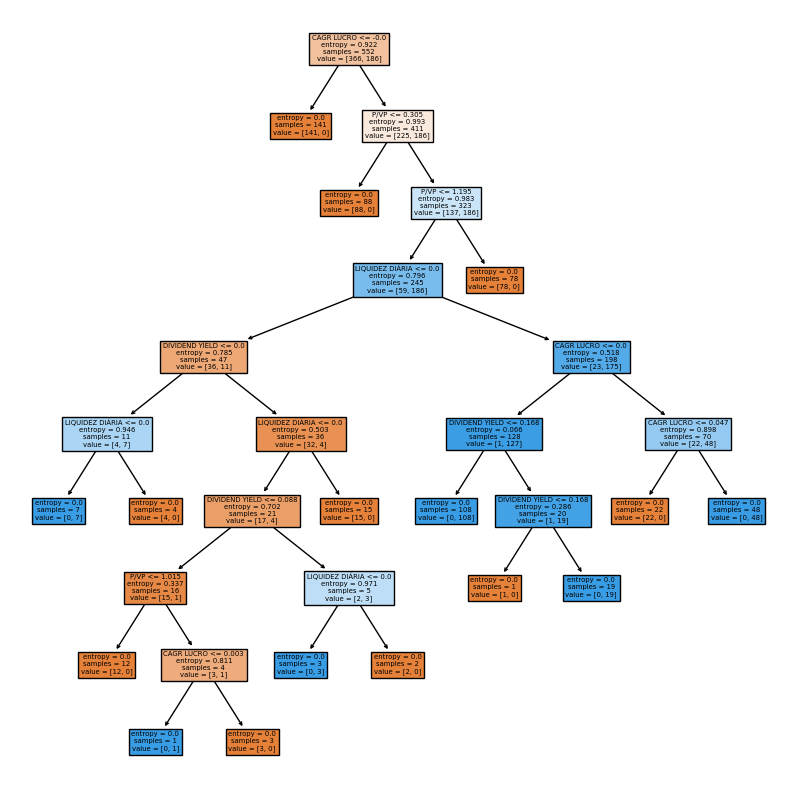

In [98]:
# Plot da árvore de decisão

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = ['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO']

fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(classifier, feature_names=feature_names, filled=True, ax=ax)
plt.show()


In [99]:
# Explorar a variável (investir)
df_final['INVESTIR']

1      1
4      1
5      1
7      0
8      1
      ..
892    1
893    0
894    0
895    1
896    0
Name: INVESTIR, Length: 736, dtype: int64

In [100]:
# Tabela para comparar os resultados
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


model1 = LinearRegression()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()
model4 = GaussianNB()
model5 = KMeans(n_clusters=5)
model6 = DecisionTreeClassifier()
models = [model1, model2, model3, model4, model5, model6]
model_names = ['Regressão Linear', 'Regressão Logística', 'KNN', 'Naive Bayes', 'KMeans', 'Árvore de Decisão']

metrics = {
    'Acurácia': accuracy_score,
    'Precisão': precision_score,
    'Revocação': recall_score
}

results = {}

for model, name in zip(models, model_names):
    model_results = {}
    
    for metric_name, metric_func in metrics.items():
        scores = cross_val_score(model, X, y, cv=5, scoring=make_scorer(metric_func))
        model_results[metric_name] = scores.mean()
    
    results[name] = model_results

print("Modelo\t\t\tAcurácia\tPrecisão\tRevocação")
for name, metrics in results.items():
    print(f"{name:20s}\t{metrics['Acurácia']:.4f}\t\t{metrics['Precisão']:.4f}\t\t{metrics['Revocação']:.4f}")
    
'''Modelo             Acurácia   Precisão   Revocação
Regressão Linear       nan         nan       nan
Regressão Logística   0.6264      0.4078    0.0667
KNN                   0.8221      0.7223    0.8178
Naive Bayes           0.6997      0.6755    0.5595
KMeans                0.2296      nan       nan
Árvore de Decisão     0.9755      0.9474    0.9724
'''

Modelo			Acurácia	Precisão	Revocação
Regressão Linear    	nan		nan		nan
Regressão Logística 	0.6264		0.4078		0.0667
KNN                 	0.8221		0.7223		0.8178
Naive Bayes         	0.6997		0.6755		0.5595
KMeans              	0.2569		nan		nan
Árvore de Decisão   	0.9728		0.9580		0.9763


'Modelo             Acurácia   Precisão   Revocação\nRegressão Linear       nan         nan       nan\nRegressão Logística   0.6264      0.4078    0.0667\nKNN                   0.8221      0.7223    0.8178\nNaive Bayes           0.6997      0.6755    0.5595\nKMeans                0.2296      nan       nan\nÁrvore de Decisão     0.9755      0.9474    0.9724\n'

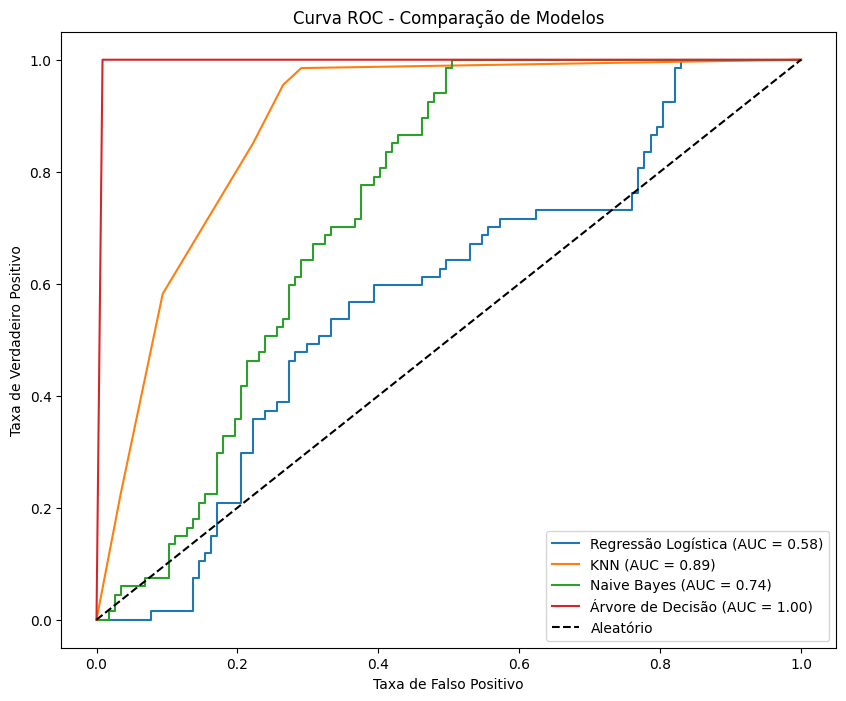

In [101]:
# Curva ROC para análise de modelos

from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = GaussianNB()
model4 = DecisionTreeClassifier()

models = [model1, model2, model3, model4]
model_names = ['Regressão Logística', 'KNN', 'Naive Bayes', 'Árvore de Decisão']

plt.figure(figsize=(10, 8))
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    if hasattr(model, 'predict_proba'):
        probs = model.predict_proba(X_test)[:, 1]
    else:
        decision_scores = model.decision_function(X_test)
        probs = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    auc_score = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - Comparação de Modelos')
plt.legend()
plt.show()


In [102]:
# Exportar dataset para rodar a aplicação (já foi feito isso)
#df_final.to_excel("Tree_decision.xlsx")

In [103]:
# Aplicação Fe²

import joblib
import pandas as pd
import streamlit as st
from sklearn.tree import DecisionTreeClassifier

X = df_final[['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO']]
y = df_final["INVESTIR"]

clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X, y)

# Title
st.header("Fe²")

# Input bar 1
liquidez = st.number_input("Liq. Diária: ")

# Input bar 2
pvp = st.number_input("P/VP: ")

# Input bar 3
dy = st.number_input("Dividend Yield: ")

# Input bar 4
cagr = st.number_input("CAGR: ")

# If button is pressed
if st.button("Submit"):
    # Previsão com o modelo
    y_pred = clf.predict([[dy, liquidez, pvp, cagr]])
    
    # Mapear os valores da previsão para "Investir" ou "Não Investir"
    investimento = "Investir" if y_pred[0] == 1 else "Não Investir"
    
    st.text("Resultado da previsão: " + investimento)


2023-07-01 00:42:53.404 
  command:

    streamlit run C:\Users\elysi\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [104]:
# Código para executar a aplicação no terminal

# streamlit run invest.py